# MHEALTH dataset

Enlace al dataset: https://archive.ics.uci.edu/dataset/319/mhealth+dataset

In [1]:
# Importacion de librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import random

In [2]:
# Estilos y colores posibles
styles = ['whitegrid', 'darkgrid', 'white', 'dark', 'ticks']
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray', 'cyan', 'magenta']

# Función para escoger un estilo y color aleatorio
def random_style():
    return random.choice(styles)

def random_color():
    return random.choice(colors)


## Importación del dataset

In [3]:
data_path = "C:/Users/C-Ramirez/Documents/LCC/RAHBFDP/ProyectoFinal/MHEALTHDATASET" #Cram
#data_path = "C:/Users/david/Documents/FD/MHEALTHDATASET" #David

In [4]:
with open(data_path+"/README.txt",'r',encoding="ansi") as readme:
    txt = readme.read()
    print(txt)


*************************************************** mHealth dataset **********************************************************

Authors: Oresti Baños, Rafael Garcia, Alejandro Saez
Date: 22/10/2013
Institution: University of Granada (UGR) 
Department: Department of Computer Architecture and Computer Technology.
Contact: oresti@ugr.es (oresti.bl@gmail.com)

---------------------------------------------------------------------------------------------------------------------------------------------
NOTE: if you use this dataset please cite the following work

Banos, O., Garcia, R., Holgado-Terriza, J.A., Damas, M., Pomares, H., Rojas, I., Saez, A., Villalonga, C.: 
mHealthDroid: a novel framework for agile development of mobile health applications. 
In: Proceedings of the 6th International Work-conference on Ambient Assisted Living an Active Ageing (IWAAL 2014), Belfast, United Kingdom, December 2-5 (2014)

Insightful figures and descriptions are presented within this work.
-------------

In [5]:
# Nombres de las columnas
column_names = ["subject","acc_chest_x","acc_chest_y","acc_chest_z", 
    "electrocardiogram_l1","electrocardiogram_l2", "acc_left_ankle_x", "acc_left_ankle_y", "acc_left_ankle_z", 
    "gyro_left_ankle_x", "gyro_left_ankle_y", "gyro_left_ankle_z", 
    "MAG_left_ankle_x", "MAG_left_ankle_y", "MAG_left_ankle_z",
    "acc_r_lw_arm_x","acc_r_lw_arm_y","acc_r_lw_arm_z",
    "gyro_r_lw_arm_x","gyro_r_lw_arm_y","gyro_r_lw_arm_z",
    "MAG_r_lw_arm_x","MAG_r_lw_arm_y","MAG_r_lw_arm_z",
    "label"
    ]
# Creacion de dataframe vacio
data = pd.DataFrame(columns=column_names)

In [6]:
# Carga de datasets de cada sujeto y concatenación en un mismo dataframe
for i, file in enumerate(os.listdir(data_path)):
    if file != "README.txt":
        df_tmp = pd.read_csv(os.path.join(data_path, file), header=None, sep="\t")
        df_tmp.columns = column_names[1:]
        df_tmp["subject"] = i+1
        data = pd.concat([data, df_tmp])
        

C:\Users\C-Ramirez\AppData\Local\Temp\ipykernel_34240\1758140931.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, df_tmp])


## Dimensiones del dataset y primeras 5 líneas

In [7]:
data.shape

(1215745, 25)

In [8]:
data.head()

,subject,acc_chest_x,acc_chest_y,acc_chest_z,electrocardiogram_l1,electrocardiogram_l2,acc_left_ankle_x,acc_left_ankle_y,acc_left_ankle_z,gyro_left_ankle_x,...,acc_r_lw_arm_x,acc_r_lw_arm_y,acc_r_lw_arm_z,gyro_r_lw_arm_x,gyro_r_lw_arm_y,gyro_r_lw_arm_z,MAG_r_lw_arm_x,MAG_r_lw_arm_y,MAG_r_lw_arm_z,label
0,1,-9.8184,0.009971,0.29563,0.004186,0.004186,2.1849,-9.6967,0.63077,0.103900,...,-8.6499,-4.5781,0.187760,-0.44902,-1.0103,0.034483,-2.35000,-1.610200,-0.030899,0
1,1,-9.8489,0.524040,0.37348,0.004186,0.016745,2.3876,-9.5080,0.68389,0.085343,...,-8.6275,-4.3198,0.023595,-0.44902,-1.0103,0.034483,-2.16320,-0.882540,0.326570,0
2,1,-9.6602,0.181850,0.43742,0.016745,0.037677,2.4086,-9.5674,0.68113,0.085343,...,-8.5055,-4.2772,0.275720,-0.44902,-1.0103,0.034483,-1.61750,-0.165620,-0.030693,0
3,1,-9.6507,0.214220,0.24033,0.079540,0.117220,2.1814,-9.4301,0.55031,0.085343,...,-8.6279,-4.3163,0.367520,-0.45686,-1.0082,0.025862,-1.07710,0.006945,-0.382620,0
4,1,-9.7030,0.303890,0.31156,0.221870,0.205130,2.4173,-9.3889,0.71098,0.085343,...,-8.7008,-4.1459,0.407290,-0.45686,-1.0082,0.025862,-0.53684,0.175900,-1.095500,0


## Datos ausentes

Primero debemos verificar si nuestro dataset tiene presencia o no de datos nulos:

In [8]:
data.isnull().sum() # Conteo de nulos por columna

subject                 0
acc_chest_x             0
acc_chest_y             0
acc_chest_z             0
electrocardiogram_l1    0
electrocardiogram_l2    0
acc_left_ankle_x        0
acc_left_ankle_y        0
acc_left_ankle_z        0
gyro_left_ankle_x       0
gyro_left_ankle_y       0
gyro_left_ankle_z       0
MAG_left_ankle_x        0
MAG_left_ankle_y        0
MAG_left_ankle_z        0
acc_r_lw_arm_x          0
acc_r_lw_arm_y          0
acc_r_lw_arm_z          0
gyro_r_lw_arm_x         0
gyro_r_lw_arm_y         0
gyro_r_lw_arm_z         0
MAG_r_lw_arm_x          0
MAG_r_lw_arm_y          0
MAG_r_lw_arm_z          0
label                   0
dtype: int64

En este caso notamos que ninguna columna cuenta con valores nulos, por lo tanto seguimos adelante con el proceso.

## Tipos de datos por atributo

In [9]:
data.dtypes # Desplegar tipos de datos de cada atributo

subject                  object
acc_chest_x             float64
acc_chest_y             float64
acc_chest_z             float64
electrocardiogram_l1    float64
electrocardiogram_l2    float64
acc_left_ankle_x        float64
acc_left_ankle_y        float64
acc_left_ankle_z        float64
gyro_left_ankle_x       float64
gyro_left_ankle_y       float64
gyro_left_ankle_z       float64
MAG_left_ankle_x        float64
MAG_left_ankle_y        float64
MAG_left_ankle_z        float64
acc_r_lw_arm_x          float64
acc_r_lw_arm_y          float64
acc_r_lw_arm_z          float64
gyro_r_lw_arm_x         float64
gyro_r_lw_arm_y         float64
gyro_r_lw_arm_z         float64
MAG_r_lw_arm_x          float64
MAG_r_lw_arm_y          float64
MAG_r_lw_arm_z          float64
label                    object
dtype: object

## Resumen estadístico del dataset

#### Resumen general:

In [10]:
pd.options.display.float_format = '{:.4f}'.format ## Desplegar resultados con 4 decimales de precisión
print(data.describe()) # Imprimir resumen estadístico

       acc_chest_x  acc_chest_y  acc_chest_z  electrocardiogram_l1  \
count 1215745.0000 1215745.0000 1215745.0000          1215745.0000   
mean       -8.5224      -0.2140      -1.0559               -0.0051   
std         4.0753       2.1390       3.5742                0.7466   
min       -22.4380     -20.1880     -18.4010               -8.6196   
25%        -9.8040      -1.2729      -2.8673               -0.2344   
50%        -9.3114      -0.3538      -0.8702               -0.0712   
75%        -7.6371       0.7098       0.7259                0.1591   
max        19.0940      20.9270      26.1960                8.5149   

       electrocardiogram_l2  acc_left_ankle_x  acc_left_ankle_y  \
count          1215745.0000      1215745.0000      1215745.0000   
mean                -0.0045            1.4942           -9.6929   
std                  0.7270            3.8265            4.1713   
min                 -8.6196          -22.1460          -19.6190   
25%                 -0.1884       

A primera vista podemos notar que los datos que nos brindan una mayor variabilidad son, en su mayoría, aquellos proporcionados por los acelerómetros y magnetómetros (mayor desviación estándar / std). 

Sin embargo, en el caso del magnetómetro, vemos que estos tienen rangos muy amplios comparados con la media y los cuartiles, lo que podría ser indicio de algún desperfecto o desajuste en los sensores.

De igual forma, basándonos en los mínimos y máximos de cada característica, podemos observar una gran diferencia de escalas en algunos casos, por lo que se abre la posibilidad de tener que realizar un reescalado de características.

Finalmente, podemos notar que en la mayoría de los casos, las medias y las medianas no son muy distintas, lo que indica distribuciones más simétricas.

#### Resumen por sujeto:

In [11]:
pd.options.display.float_format = '{:.3f}'.format ## Desplegar resultados con 4 decimales de precisión
data.groupby("subject").describe() # Imprimir resumen estadístico por sujeto

acc_chest_x                                                    \
              count   mean   std     min     25%    50%    75%    max   
subject                                                                 
1        161280.000 -8.738 3.806 -22.303  -9.833 -9.331 -8.021 18.960   
2         98304.000 -8.417 4.094 -22.139  -9.758 -9.175 -6.629 17.618   
3        130561.000 -8.859 3.601 -22.295  -9.871 -9.399 -8.219 16.526   
4        122112.000 -8.332 4.145 -22.438  -9.823 -9.156 -7.248 19.065   
5        116736.000 -7.831 4.278 -22.259  -9.694 -9.073 -6.633 19.094   
6        119808.000 -8.647 4.315 -22.168 -10.006 -9.373 -7.736 19.082   
7         98304.000 -8.633 4.007 -22.321  -9.829 -9.468 -7.912 14.857   
8        104448.000 -8.440 4.185 -22.266  -9.743 -9.375 -7.577 18.975   
9        129024.000 -8.558 3.976 -22.289  -9.698 -9.191 -8.246 17.204   
10       135168.000 -8.625 4.312 -22.306  -9.835 -9.464 -7.538 19.078   

        acc_chest_y         ... MAG_r_lw_arm_y         MAG_r_lw_arm_z         \
              count   mean  ...            75%     max          count   mean   
subject                     ...                                                
1        161280.000  0.186  ...         10.905 334.980     161280.000 -0.231   
2         98304.000  0.201  ...         10.136 332.060      98304.000 -0.840   
3        130561.000 -0.187  ...          9.472 336.220     130561.000 -0.041   
4        122112.000  0.004  ...         12.619 337.760     122112.000  0.380   
5        116736.000 -0.190  ...         12.067 335.250     116736.000 -0.592   
6        119808.000 -0.419  ...         11.873 334.450     119808.000 -0.384   
7         98304.000 -0.224  ...          7.673 330.420      98304.000 -0.738   
8        104448.000 -0.333  ...          7.628 331.170     104448.000 -0.301   
9        129024.000 -0.375  ...          8.212 334.120     129024.000 -0.097   
10       135168.000 -0.802  ...         10.358 336.120     135168.000 -1.003   

                                                       
           std      min     25%    50%    75%     max  
subject                                                
1       62.555 -697.160 -13.399 -0.370 12.793 629.950  
2       60.940 -504.800 -15.257 -0.715 14.133 616.930  
3       66.663 -601.630 -14.314 -0.359 13.170 506.320  
4       79.465 -607.100 -16.956 -0.359 17.996 657.180  
5       52.193 -615.100 -13.306 -0.361 12.359 655.860  
6       74.031 -678.360 -19.639 -0.718 16.425 519.590  
7       69.244 -680.820 -14.988 -0.716 13.703 585.170  
8       59.335 -453.910 -10.596 -0.377  9.195 440.690  
9       72.850 -717.550  -9.780 -0.602  8.418 626.590  
10      87.499 -668.430 -16.811 -0.713 15.237 602.580  

[10 rows x 184 columns]

Podemos notar estadísticas similares a las generales en su mayoría.

## Distribución de clases

#### Distribución general:

In [12]:
class_freq = data.groupby("label").size() # Agrupar por label y desplegar conteo
class_freq

label
0     872550
1      30720
2      30720
3      30720
4      30720
5      30720
6      28315
7      29441
8      29337
9      30720
10     30720
11     30720
12     10342
dtype: int64

In [12]:
print(f"Porcentaje de la clase 0: {class_freq[0]/class_freq.sum()*100}%")

Porcentaje de la clase 0: 71.77080720052314%


Podemos darnos cuenta de que nuestro dataset está desbalanceado, pues el 70% de nuestros datos corresponde a la clase de actividad nula (0). En este caso, sin embargo, debido a que esta clase representa los tiempos en los que no se realizó ninguna de las actividades de interés (transiciones entre actividades), podemos simplemente omitirla. 

De igual forma, se debe notar que la actividad 12 también está presente una cantidad menor de veces que el resto, por lo que es un factor a tomar en cuenta al seleccionar un modelo, o resamplear los datos.

#### Distribución por sujeto:

In [13]:
class_freq_p_subject = data.groupby(["subject","label"]).size() # Agrupar por sujeto y label y desplegar conteo

In [14]:
pd.set_option("display.max_rows", None)  # Muestra todas las filas
print(class_freq_p_subject)

subject  label
1        0        126106
         1          3072
         2          3072
         3          3072
         4          3072
         5          3072
         6          3072
         7          3072
         8          3379
         9          3072
         10         3072
         11         3072
         12         1075
2        0         64614
         1          3072
         2          3072
         3          3072
         4          3072
         5          3072
         6          2458
         7          2765
         8          2867
         9          3072
         10         3072
         11         3072
         12         1024
3        0         95029
         1          3072
         2          3072
         3          3072
         4          3072
         5          3072
         6          3174
         7          3328
         8          3430
         9          3072
         10         3072
         11         3072
         12         1024
4        0

Podemos notar que la distribución de clases por sujeto es similar a la distribución de clases general, lo cual también se pudo apreciar en el resumen estadístico.

## Correlación entre atributos

In [15]:
print(data.corr()) # Desplegamos la correlacion de Pearson entre atributos

                      subject  acc_chest_x  acc_chest_y  acc_chest_z  \
subject                 1.000        0.005       -0.124        0.061   
acc_chest_x             0.005        1.000        0.075        0.178   
acc_chest_y            -0.124        0.075        1.000       -0.347   
acc_chest_z             0.061        0.178       -0.347        1.000   
electrocardiogram_l1    0.007        0.024        0.027       -0.010   
electrocardiogram_l2    0.011       -0.003        0.007       -0.010   
acc_left_ankle_x        0.077        0.050       -0.028        0.090   
acc_left_ankle_y       -0.007        0.306       -0.092        0.230   
acc_left_ankle_z        0.071        0.102       -0.100        0.235   
gyro_left_ankle_x       0.131        0.043       -0.038        0.048   
gyro_left_ankle_y       0.060        0.248       -0.120        0.250   
gyro_left_ankle_z       0.081        0.050       -0.174        0.230   
MAG_left_ankle_x        0.001        0.092       -0.036        0

Se puede ver que algunos atributos con una correlación considerable son:

- gyro_r_lw_arm_y con acc_r_lw_arm_y: 0.5921

- electrocardiogram_l1 con electrocardiogram_l2: 0.5965

- gyro_r_lw_arm_z con gyro_left_ankle_x: 0.5914

## Histogramas de los atributos

### Histogramas de cada atributo por persona

In [ ]:
#output_dir = 'C:/Users/david/Documents/FD_IMAGENES/HISTOGRAMAS_SUJETOS'
output_dir = 'C:/Users/C-Ramirez/Documents/LCC/RAHBFDP/ProyectoFinal/HISTOGRAMAS_SUJETOS'
os.makedirs(output_dir, exist_ok=True)

attributes = data.columns.difference(['subject', 'label'])

# Histogramas por sujeto
for col in attributes:
    sns.set_style(random_style())
    color = random_color()
    
    plt.figure(figsize=(12, 8))
    
    g = sns.FacetGrid(data, col='subject', col_wrap=4, height=3, sharex=False, sharey=False)
    g.map(sns.histplot, col, bins='sturges', color=color, edgecolor='black')
    
    g.fig.suptitle(f'Histogramas de {col} por sujeto', fontsize=16, fontweight='bold', y=1.05)
    plt.savefig(f'{output_dir}/Histogramas de {col} por sujeto.png', bbox_inches='tight', facecolor='white')
    plt.close()

c:\Users\C-Ramirez\anaconda3\Lib\site-packages\seaborn\axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)
C:\Users\C-Ramirez\AppData\Local\Temp\ipykernel_21684\3158125888.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12, 8))


<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

### Histogramas generales

In [142]:
output_dir = 'C:/Users/david/Documents/FD_IMAGENES/HISTOGRAMAS_GENERALES'
os.makedirs(output_dir, exist_ok=True)


attributes = data.columns.difference(['subject', 'label'])

# Histogramas generales para cada atributo
for col in attributes:
    color = random_color()
    plt.figure(figsize=(8, 5))
    sns.histplot(data[col], bins='sturges', color=color, edgecolor='black')
    
    plt.title(f'Histograma de {col}', fontsize=16, fontweight='bold')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    
    plt.savefig(f'{output_dir}/Histograma de {col}.png', bbox_inches='tight', facecolor='white')
    plt.close()

## Gráficas de densidad

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os

### Gráficas de densidad individuales

In [152]:
output_dir = 'C:/Users/david/Documents/FD_IMAGENES/DENSIDAD_SUJETOS'
os.makedirs(output_dir, exist_ok=True)

for col in attributes:
    sns.set_style(random_style())
    color = random_color()
    
    plt.figure(figsize=(12, 8))
    
    g = sns.FacetGrid(data, col='subject', col_wrap=4, height=3, sharex=False, sharey=False)
    g.map(sns.kdeplot, col, fill=True, color=color)
    
    g.fig.suptitle(f'Gráfica de Densidad de {col} por sujeto', fontsize=16, fontweight='bold', y=1.05)
    plt.savefig(f'{output_dir}/Densidad de {col} por sujeto.png', bbox_inches='tight', facecolor='white')
    plt.close()

C:\Users\david\anaconda3\Lib\site-packages\seaborn\axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)
C:\Users\david\AppData\Local\Temp\ipykernel_102148\3831397457.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12, 8))


<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

### Gráficas de densidad generales

In [146]:
output_dir = 'C:/Users/david/Documents/FD_IMAGENES/DENSIDAD_GENERAL'
os.makedirs(output_dir, exist_ok=True)

for col in attributes:
    sns.set_style(random_style())
    color = random_color()
    
    plt.figure(figsize=(12, 8))
    sns.kdeplot(data[col], color=color, fill=True)
    
    plt.title(f'Gráfica de Densidad de {col}', fontsize=16, fontweight='bold')
    plt.savefig(f'{output_dir}/Densidad de {col}.png', bbox_inches='tight', facecolor='white')
    plt.close()

## Gráficas de caja y bigotes

### Gráficas de densidad individuales

In [156]:
output_dir = 'C:/Users/david/Documents/FD_IMAGENES/BOXPLOT_SUJETOS'
os.makedirs(output_dir, exist_ok=True)

for col in attributes:
    sns.set_style(random_style())
    color = random_color()
    
    plt.figure(figsize=(12, 8))
    
    g = sns.FacetGrid(data, col='subject', col_wrap=4, height=3, sharex=False, sharey=False)
    g.map(sns.boxplot, col, color=color)
    
    g.fig.suptitle(f'Gráfica de Cajas y Bigotes de {col} por sujeto', fontsize=16, fontweight='bold', y=1.05)
    plt.savefig(f'{output_dir}/Boxplot de {col} por sujeto.png', bbox_inches='tight', facecolor='white')
    plt.close()

C:\Users\david\anaconda3\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\david\anaconda3\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\david\anaconda3\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\david\anaconda3\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\david\anaconda3\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

### Gráficas de caja y bigotes generales

In [157]:
output_dir = 'C:/Users/david/Documents/FD_IMAGENES/BOXPLOT_GENERAL'
os.makedirs(output_dir, exist_ok=True)

for col in attributes:
    sns.set_style(random_style())
    color = random_color()
    
    plt.figure(figsize=(12, 8))
    sns.boxplot(y=data[col], color=color)
    
    plt.title(f'Gráfica de Cajas y Bigotes de {col}', fontsize=16, fontweight='bold')
    plt.savefig(f'{output_dir}/Boxplot de {col}.png', bbox_inches='tight', facecolor='white')
    plt.close()


## Matrices de correlaciones

### Matrices de correlaciones generales

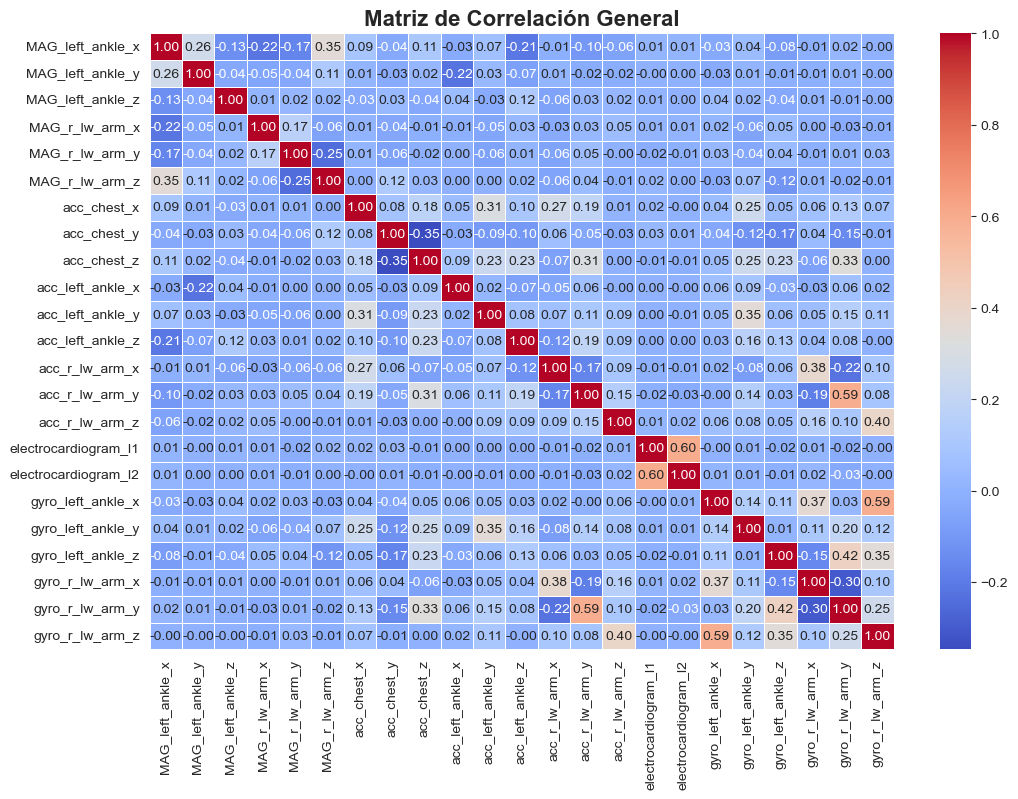

In [21]:
#output_dir = 'C:/Users/david/Documents/FD_IMAGENES/CORRELACION_GENERAL'
output_dir = 'C:/Users/C-Ramirez/Documents/LCC/RAHBFDP/ProyectoFinal/CORRELACION_GENERAL'
os.makedirs(output_dir, exist_ok=True)

sns.set_style(random_style())

plt.figure(figsize=(12, 8))
corr = data[attributes].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Matriz de Correlación General', fontsize=16, fontweight='bold')
plt.savefig(f'{output_dir}/Matriz de Correlación General.png', bbox_inches='tight', facecolor='white')
plt.show()
plt.close()


## Matrices de dispersión

### Matrices de dispersión generales

In [ ]:
output_dir = 'C:/Users/david/Documents/FD_IMAGENES/DISPERSION_GENERAL_2'
os.makedirs(output_dir, exist_ok=True)

sns.set_style(random_style())

plt.figure(figsize=(12, 8))
g = sns.pairplot(data[attributes], diag_kind='kde')
g.fig.suptitle('Matriz de Dispersión General', fontsize=16, fontweight='bold', y=1.02)
plt.savefig(f'{output_dir}/Matriz de Dispersión General.png', bbox_inches='tight', facecolor='white')
plt.close()

## Manejo de desbalance de clases

A continuación se presentan los distintos ordenes de aparición de cada actividad en las distintas series de tiempo de cada sujeto:

In [7]:
activity_blocks = dict()
# iteramos sobre cada sujeto
for i in range(1,11):
    prev = -1
    act_block = list() # lista vacia para almacenar el orden de las actividades para el sujeto i
    # iteramos sobre la columna label por cada sujeto
    for cur in data[data["subject"]==i]["label"]:
        # si el elemento actual es diferente al elemento previo, añadimos un bloque para la actividad a la lista
        if cur!=prev:
            act_block.append(cur)
        prev = cur # hacemos el elemento actual el previo
    activity_blocks[i] = act_block # añadimos la lista al diccionario

for subject, blocks in activity_blocks.items():
    print(subject, ":", blocks)

1 : [0, 1, 0, 2, 0, 3, 0, 4, 0, 6, 0, 7, 0, 8, 0, 9, 0, 10, 0, 11, 0, 12, 0, 5, 0]
2 : [0, 5, 0, 1, 0, 2, 0, 3, 0, 4, 0, 6, 0, 7, 0, 8, 0, 9, 0, 10, 0, 11, 0, 12, 0]
3 : [0, 5, 0, 1, 0, 2, 0, 3, 0, 4, 0, 6, 0, 7, 0, 8, 0, 10, 0, 11, 0, 12, 0, 9, 0]
4 : [0, 1, 0, 2, 0, 3, 0, 4, 0, 6, 0, 7, 0, 8, 0, 9, 0, 10, 0, 11, 0, 12, 0, 5, 0]
5 : [0, 5, 0, 1, 0, 2, 0, 3, 0, 4, 0, 6, 0, 7, 0, 8, 0, 9, 0, 10, 0, 11, 0, 12, 0]
6 : [0, 1, 0, 2, 0, 3, 0, 4, 0, 6, 0, 7, 0, 8, 0, 9, 0, 10, 0, 11, 0, 12, 0, 5, 0]
7 : [0, 1, 0, 2, 0, 3, 0, 4, 0, 6, 0, 7, 0, 8, 0, 9, 0, 10, 0, 11, 0, 12, 0, 5, 0]
8 : [0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 1, 0, 2, 0, 3, 0, 4, 0, 6, 0, 7, 0, 8, 0, 9, 0, 10, 0, 11, 0, 12, 0]
9 : [0, 1, 0, 3, 0, 2, 0, 4, 0, 5, 0, 5, 0, 6, 0, 7, 0, 8, 0, 9, 0, 10, 0, 11, 0, 12, 0]
10 : [0, 1, 0, 2, 0, 3, 0, 4, 0, 6, 0, 7, 0, 8, 0, 9, 0, 10, 0, 11, 0, 12, 0, 5, 0]


De esta manera confirmamos que la actividad 0 está presente únicamente en las transiciones entre las actividades de estudio, por lo que el eliminarlas no afectará la secuencialidad de estas.

Debido a esto se tomó la decisión de eliminar cada ejemplo de la actividad nula para así balancear el dataset.

In [8]:
data = data[data['label'] != 0]
data = data.reset_index(drop=True)

In [9]:
data.shape

(343195, 25)

In [10]:
data.groupby("label").size()

label
1     30720
2     30720
3     30720
4     30720
5     30720
6     28315
7     29441
8     29337
9     30720
10    30720
11    30720
12    10342
dtype: int64

Asimismo, decidimos dejar intacta la clase 12, a pesar de tener un 60% menos de ejemplos a comparación del resto de clases.

Sin embargo, resaltamos que debido a esto requeriremos hacer uso de metricas que nos permitan evaluar correctamente el desempeño del modelo tomando en cuenta este desbalance (ej. F1-macro).

Müller, A. & Guido S., (2017), *Introduction to Machine Learning with Python*

In [13]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [14]:
# Seleccionar solo las columnas numéricas excluyendo 'subject' y 'label'
numerical_cols = [col for col in data.columns if col not in ['subject', 'label']]


# Aplicar estandarización (Z-score)
standard_scaler = StandardScaler()
data[numerical_cols] = standard_scaler.fit_transform(data[numerical_cols])

# Ver los primeros ejemplos estandarizados 
print(data.head())

  subject  acc_chest_x  acc_chest_y  acc_chest_z  electrocardiogram_l1  \
0       1    -0.402237     0.249278     0.463206              0.005629   
1       1    -0.401272     0.149935     0.361900             -0.034285   
2       1    -0.416635     0.091640     0.376976              0.025586   
3       1    -0.395590     0.113398     0.396427              0.210185   
4       1    -0.402815     0.127633     0.399487              0.105413   

   electrocardiogram_l2  acc_left_ankle_x  acc_left_ankle_y  acc_left_ankle_z  \
0             -0.029663          0.200304         -0.075035          0.167061   
1             -0.019902          0.144872         -0.090207          0.170926   
2              0.028905          0.137943         -0.103380          0.183256   
3              0.160678          0.135404         -0.103495          0.175169   
4              0.063070          0.123089         -0.092130          0.170708   

   gyro_left_ankle_x  ...  acc_r_lw_arm_x  acc_r_lw_arm_y  acc_r_lw_

# Extracción de Características

## Acelerómetro

Para la extracción de características de los datos provenientes de los acelerómetros, tomaremos como guía lo mencionado en García-Ceja, E. (2018), tanto en el tamaño de las ventanas de tiempo (3 segundos sin overlapping), como en las características por extraer de los sensores:

- Media de cada uno de los 3 ejes (X, Y, Z).
- Desviación estándar de cada uno de los 3 ejes.
- Valor máximo de cada uno de los 3 ejes.
- Correlación entre cada par de ejes (XY, XZ, YZ).
- Media de la magnitud de la señal.
- Desviación estándar de la magnitud de la señal.
- Área bajo la curva (AUC) de la magnitud (según la ecuación 1 del documento).
- Diferencias medias de la magnitud entre lecturas consecutivas (según la ecuación 2 del documento).
- Magnitud de la señal, que representa la contribución total de la aceleración de los 3 ejes (según la ecuación 3 del documento).

$$
AUC = \sum_{t=1}^{T} magnitude(t)
$$

$$
meandif = \frac{1}{T-1} \sum_{t=2}^{T} \left( magnitude(t) - magnitude(t-1) \right)
$$

$$
Magnitude(x, y, z, t) = \sqrt{a_x(t)^2 + a_y(t)^2 + a_z(t)^2}
$$


In [11]:
acc_columns = [col for col in column_names if "acc" in col]
acc_columns

['acc_chest_x',
 'acc_chest_y',
 'acc_chest_z',
 'acc_left_ankle_x',
 'acc_left_ankle_y',
 'acc_left_ankle_z',
 'acc_r_lw_arm_x',
 'acc_r_lw_arm_y',
 'acc_r_lw_arm_z']

In [12]:
sampling_rate = 50  # Número de muestras por segundo
window_size = 3 * sampling_rate  # Ventana de 3 segundos

In [13]:
rows = []
for (subject, label), group in data.groupby(['subject', 'label']):
    num_samples = len(group)

    # Iterar sobre ventanas sin solapamiento
    for start in range(0, num_samples,window_size):

        end = start + window_size
        window = group.iloc[start:end]

        # Verificar si la ventana tiene el tamaño correcto
        if len(window) == window_size:

            row = {'label': label, 'subject':subject}
            # Iterar sobre el listado de aceleronetros
            for k in range(0,len(acc_columns),3):
                sensor = acc_columns[k][:-2]
                
                x = window[acc_columns[k]]
                y = window[acc_columns[k+1]]
                z = window[acc_columns[k+2]]

                # Calcular magnitudes
                magnitude = np.sqrt(x**2 + y**2 + z**2)

                # Calcular features
                row["auc_"+sensor] = magnitude.sum()
                row["meandif_"+sensor] = np.diff(magnitude).mean()
                row["mean_magnitude_"+sensor] = magnitude.mean()
                row["std_magnitude"+sensor] = magnitude.std()
                row["corr_x_y_"+sensor] = x.corr(y)
                row["corr_x_z_"+sensor] = x.corr(z)
                row["corr_y_z_"+sensor] = y.corr(z)
                row["mean_x_"+sensor] = x.mean()
                row["mean_y_"+sensor] = y.mean()
                row["mean_z_"+sensor] = z.mean()
                row["std_x_"+sensor] = x.std()
                row["std_y_"+sensor] = y.std()
                row["std_z_"+sensor] = z.std()
                row["max_x_"+sensor] = x.max()
                row["max_y_"+sensor] = y.max()
                row["max_z_"+sensor] = z.max()

            # Añadir fila a la lista de filas
            rows.append(row)
        else:
            break

In [14]:
data_acc = pd.DataFrame(rows)
data_acc.head()

,label,subject,auc_acc_chest,meandif_acc_chest,mean_magnitude_acc_chest,std_magnitudeacc_chest,corr_x_y_acc_chest,corr_x_z_acc_chest,corr_y_z_acc_chest,mean_x_acc_chest,...,corr_y_z_acc_r_lw_arm,mean_x_acc_r_lw_arm,mean_y_acc_r_lw_arm,mean_z_acc_r_lw_arm,std_x_acc_r_lw_arm,std_y_acc_r_lw_arm,std_z_acc_r_lw_arm,max_x_acc_r_lw_arm,max_y_acc_r_lw_arm,max_z_acc_r_lw_arm
0,1,1,1465.729550,-0.000146,9.771530,0.143798,-0.201851,0.017231,0.260388,-9.730361,...,0.105322,-2.865763,-9.151108,1.742375,0.106763,0.101042,0.106991,-2.5823,-8.8917,2.0668
1,1,1,1467.693101,0.000603,9.784621,0.126717,-0.096976,0.196178,0.243963,-9.745109,...,0.144650,-2.917475,-9.116054,1.761141,0.140525,0.105934,0.104496,-2.5602,-8.8420,2.0614
2,1,1,1469.152851,-0.000991,9.794352,0.124178,-0.251488,0.158871,0.261548,-9.756214,...,0.077952,-2.897956,-9.138489,1.691269,0.115251,0.105446,0.111376,-2.5878,-8.8531,2.0148
3,1,1,1466.230479,0.000880,9.774870,0.124982,-0.130969,0.118621,0.234594,-9.738831,...,0.045396,-2.974483,-9.142608,1.632591,0.108071,0.099708,0.102014,-2.7111,-8.8724,1.9815
4,1,1,1467.239070,0.000267,9.781594,0.137273,-0.172920,0.032073,0.093991,-9.740250,...,0.285207,-2.991734,-9.123701,1.623470,0.111689,0.102397,0.111862,-2.5808,-8.8235,1.8967


In [15]:
data_acc.shape

(2230, 50)

In [16]:
data_acc.groupby("label").size() # Agrupar por label y desplegar conteo

label
1     200
2     200
3     200
4     200
5     200
6     185
7     192
8     191
9     200
10    200
11    200
12     62
dtype: int64

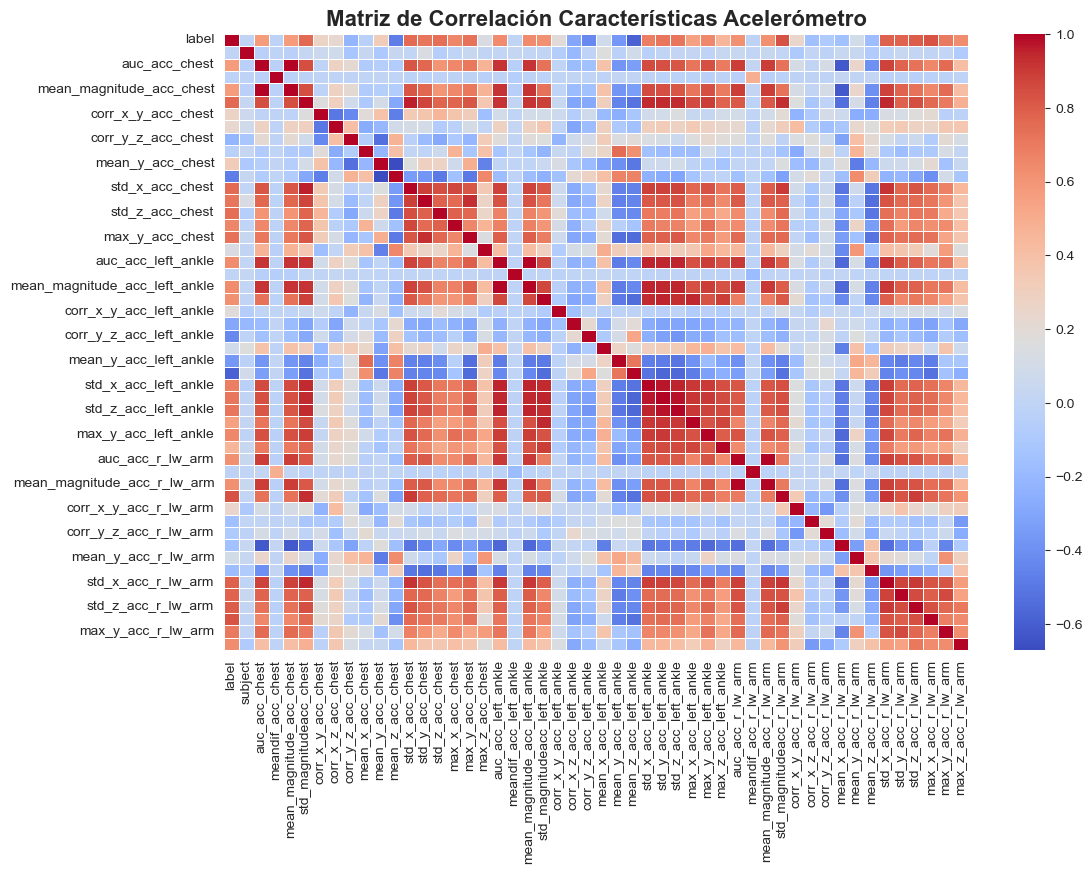

In [17]:
sns.set_style(random_style())

plt.figure(figsize=(12, 8))
corr = data_acc.corr()
sns.heatmap(corr, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Matriz de Correlación Características Acelerómetro', fontsize=16, fontweight='bold')
plt.show()
plt.close()

In [18]:
data_acc.describe(include=["float64"])

,auc_acc_chest,meandif_acc_chest,mean_magnitude_acc_chest,std_magnitudeacc_chest,corr_x_y_acc_chest,corr_x_z_acc_chest,corr_y_z_acc_chest,mean_x_acc_chest,mean_y_acc_chest,mean_z_acc_chest,...,corr_y_z_acc_r_lw_arm,mean_x_acc_r_lw_arm,mean_y_acc_r_lw_arm,mean_z_acc_r_lw_arm,std_x_acc_r_lw_arm,std_y_acc_r_lw_arm,std_z_acc_r_lw_arm,max_x_acc_r_lw_arm,max_y_acc_r_lw_arm,max_z_acc_r_lw_arm
count,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,...,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000
mean,1510.225673,-0.000505,10.068171,2.588269,0.074138,0.121810,-0.102324,-7.486356,-0.141867,-0.935944,...,0.027179,-3.443141,-5.783605,2.384664,2.964129,3.530860,1.899034,2.689075,0.736981,7.204472
std,110.907073,0.040590,0.739380,3.132022,0.325707,0.472560,0.397147,3.011093,1.756820,3.931945,...,0.310879,3.319516,4.155360,3.098606,3.859705,3.699253,2.060987,6.521779,8.524781,5.736527
min,1261.760219,-0.186274,8.411735,0.102879,-0.871886,-0.976463,-0.989858,-9.982601,-6.794258,-7.523453,...,-0.935112,-11.188025,-11.101491,-7.021962,0.085343,0.082349,0.085849,-9.452500,-9.460600,-0.588040
25%,1451.668451,-0.004902,9.677790,0.192926,-0.139706,-0.042469,-0.276668,-9.551337,-0.856900,-3.748728,...,-0.170240,-6.436540,-9.332003,0.314023,0.174321,0.131991,0.155679,-1.310025,-6.009075,2.986475
50%,1467.611124,0.000006,9.784074,1.376243,0.007862,0.163577,-0.007261,-8.723474,-0.188527,-1.661892,...,0.073545,-2.866391,-6.884250,1.712209,1.231292,2.154043,1.239852,1.528950,-2.426900,5.633200
75%,1495.669969,0.005124,9.971133,2.599340,0.223583,0.468302,0.210698,-6.870909,0.491340,0.825796,...,0.226092,-1.357844,-2.991608,4.995499,2.827673,6.457955,2.428142,5.990425,7.684075,9.968400
max,1969.079997,0.172993,13.127200,10.562476,0.989229,0.934067,0.696101,3.483569,5.752789,9.969831,...,0.869406,6.884033,8.013877,8.421832,14.164390,16.176443,9.696821,19.801000,21.965000,25.741000


## ECG

A pesar de que en el proyecto original en el que fue usado el dataset, no fue utilizada la información proveniente del ECG, nosotros consideramos su inclusión debido a que en la literatura se encontró que la fusión de datos provenientes de acelerómetros y ECG, en tareas de reconocimiento de la actividad humana, puede traer consigo mejoras significativas en el desempeño del modelo.

En Human Activity Recognition: A Comparative Study to Assess the Contribution Level of Accelerometer, ECG, and PPG Signals, se encontró específicamente que, el uso de ECG y Acelerómetro, en comparación con el uso de solo el acelerómetro, ayuda al modelo a clasificar de mejor manera entre actividades estacionarias y no estacionarias. Recalcando para nuestro caso, la mejora vista en la clasificación de las actividades "caminar" y "subir escaleras", actividades presentes en nuestro dataset.

https://www.mdpi.com/1424-8220/21/21/6997

Debido a lo anterior, también se tomó la decisión de replicar parcialmente los features utilizados en la literatura, para tratar de replicar los resultados obtenidos.

**Features:**
- mean:	average value of the datapoints
- min:	smallest value
- max:	largest value
- median:	the value at the 50% percentile
- standard deviation:	measures how scatter are the datapoints from the average value
- zero-crossing rate:	counts the number of times that the time series crosses the line  𝑦=0
- mean-crossing rate:	counts the number of times that the time series crosses the line  𝑦=𝑚𝑒𝑎𝑛

In [19]:
rows = []
for (subject, label), group in data.groupby(['subject', 'label']):
    num_samples = len(group)

    # Iterar sobre ventanas sin solapamiento
    for start in range(0, num_samples,window_size):

        end = start + window_size
        window = group.iloc[start:end]

        # Verificar si la ventana tiene el tamaño correcto
        if len(window) == window_size:

            row = dict()
            row['electrocardiogram_l1_mean'] = window['electrocardiogram_l1'].mean()
            row['electrocardiogram_l1_min'] = window['electrocardiogram_l1'].min()
            row['electrocardiogram_l1_max'] = window['electrocardiogram_l1'].max()
            row['electrocardiogram_l1_median'] = window['electrocardiogram_l1'].median()
            row['electrocardiogram_l1_std'] = window['electrocardiogram_l1'].std()
            row['electrocardiogram_l1_zero_crossing_rate'] = len(window[window["electrocardiogram_l1"]>0])
            row['electrocardiogram_l1_mean_crossing_rate']  = len(window[window["electrocardiogram_l1"]>row['electrocardiogram_l1_mean']])

            row['electrocardiogram_l2_mean'] = window['electrocardiogram_l2'].mean()
            row['electrocardiogram_l2_min'] = window['electrocardiogram_l2'].min()
            row['electrocardiogram_l2_max'] = window['electrocardiogram_l2'].max()
            row['electrocardiogram_l2_median'] = window['electrocardiogram_l2'].median()
            row['electrocardiogram_l2_std'] = window['electrocardiogram_l2'].std()
            row['electrocardiogram_l2_zero_crossing_rate'] = len(window[window["electrocardiogram_l2"]>0])
            row['electrocardiogram_l2_mean_crossing_rate']  = len(window[window["electrocardiogram_l2"]>row['electrocardiogram_l2_mean']])
            
            # Añadir fila a la lista de filas
            rows.append(row)
        else:
            break

In [20]:
data_ecg = pd.DataFrame(rows)

In [21]:
data_ecg.head()

,electrocardiogram_l1_mean,electrocardiogram_l1_min,electrocardiogram_l1_max,electrocardiogram_l1_median,electrocardiogram_l1_std,electrocardiogram_l1_zero_crossing_rate,electrocardiogram_l1_mean_crossing_rate,electrocardiogram_l2_mean,electrocardiogram_l2_min,electrocardiogram_l2_max,electrocardiogram_l2_median,electrocardiogram_l2_std,electrocardiogram_l2_zero_crossing_rate,electrocardiogram_l2_mean_crossing_rate
0,0.028885,-0.66562,0.74935,0.025118,0.141946,97,73,-0.029304,-0.43119,0.17164,-0.025118,0.097013,52,81
1,0.062041,-0.65725,0.79540,0.075353,0.146000,117,87,0.012308,-0.30560,0.28048,0.025118,0.115369,84,82
2,0.143952,-0.43956,0.86238,0.142330,0.147844,142,73,0.085540,-0.38932,0.36421,0.075353,0.107200,123,72
3,-0.050124,-0.71586,0.56515,-0.069074,0.147748,46,67,-0.111858,-0.50235,0.22187,-0.136055,0.136431,36,63
4,-0.115514,-0.86238,0.69911,-0.125590,0.152446,19,66,-0.190560,-0.54003,0.12559,-0.188380,0.112537,6,76


In [22]:
data_ecg.shape

(2230, 14)

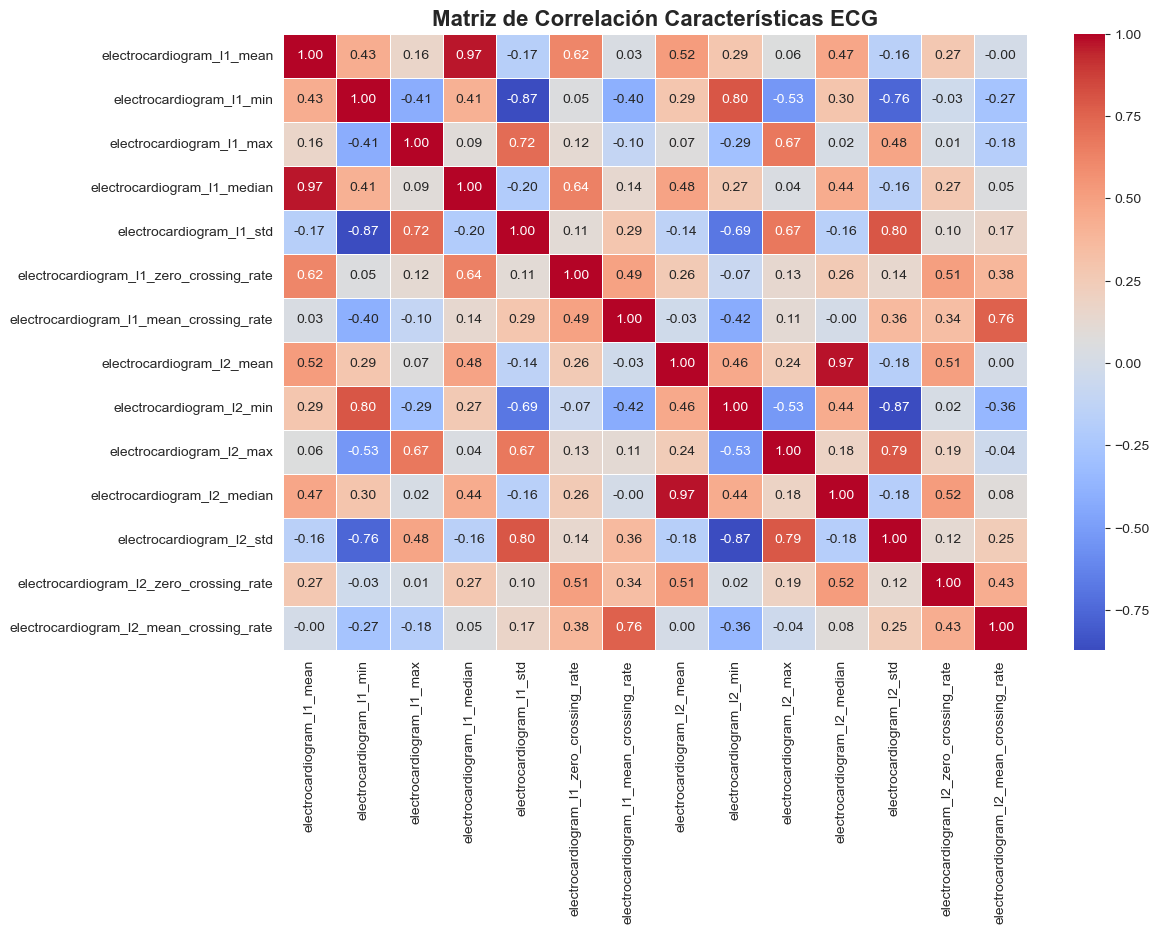

In [23]:
sns.set_style(random_style())

plt.figure(figsize=(12, 8))
corr = data_ecg.corr()
sns.heatmap(corr, cmap='coolwarm', fmt='.2f', linewidths=0.5, annot=True)

plt.title('Matriz de Correlación Características ECG', fontsize=16, fontweight='bold')
plt.show()
plt.close()

In [24]:
data_ecg.describe(include=["float64"])

,electrocardiogram_l1_mean,electrocardiogram_l1_min,electrocardiogram_l1_max,electrocardiogram_l1_median,electrocardiogram_l1_std,electrocardiogram_l2_mean,electrocardiogram_l2_min,electrocardiogram_l2_max,electrocardiogram_l2_median,electrocardiogram_l2_std
count,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000
mean,0.002990,-1.210857,2.492605,-0.068358,0.580149,-0.007840,-1.034247,1.868672,-0.052594,0.481302
std,0.424596,1.188142,1.163191,0.456693,0.438304,0.506905,1.296876,1.237997,0.529234,0.502645
min,-5.012587,-8.619600,-0.920980,-5.494500,0.114844,-7.862031,-8.619600,-6.559900,-7.953950,0.074537
25%,-0.050285,-1.330175,1.516450,-0.146520,0.374266,-0.053424,-1.088400,1.134500,-0.104660,0.254464
50%,-0.003628,-0.908420,2.545300,-0.081633,0.492831,0.000405,-0.636320,1.791700,-0.048142,0.351631
75%,0.056613,-0.598640,3.198300,0.006279,0.643098,0.056773,-0.376770,2.242850,0.025118,0.505226
max,2.946254,1.310300,8.506500,2.827800,4.573670,3.311133,1.084200,8.519100,3.407650,6.292219


## Giroscopio

De los datos obtenidos de los giroscopios, utilizaremos las características mencionadas en:

*Are Gyroscopes an Added Value in Leave-One-Subject-Out Activity Recognition with IMUs? | IEEE Conference Publication | IEEE Xplore*

Esto debido a que en este paper se encontró, que utilizando el giroscopio, en conjunto con el acelerómetro, se pueden obtener mejores resultados de clasificación para algunas actividades que también se encuentran presentes en nuestro dataset:
- Sentado
- De pie
- Subiendo escaleras

https://ieeexplore.ieee.org/document/9871845

**Características extraidas:**

Time-domain: Interquartile range, Max, Mean, Median, Min, Root mean square, Skewness, Standard deviation, Absolute energy, Autocorrelation, Centroid Entropy, Zero crossing rate, Histogram

Frequency-domain: Fundamental frequency, Max power spectrum, Maximum frequency, Median frequency, Spectral entropy, Spectral kurtosis, Spectral skewness

In [29]:
# Time Series Feature Extraction Library
!pip install tsfel 

^C


In [25]:
import tsfel

In [26]:
gyro_cols =  ["subject",
    "gyro_left_ankle_x", "gyro_left_ankle_y", "gyro_left_ankle_z", 
    "gyro_r_lw_arm_x","gyro_r_lw_arm_y","gyro_r_lw_arm_z",
    "label"
]

In [27]:
rows = []
for (subject, label), group in data.groupby(['subject', 'label']):
    num_samples = len(group)

    # Iterar sobre ventanas sin solapamiento
    for start in range(0, num_samples,window_size):

        end = start + window_size
        window = group.iloc[start:end]

        # Verificar si la ventana tiene el tamaño correcto
        if len(window) == window_size:

            row = dict()
            for col in ["gyro_left_ankle_x", "gyro_left_ankle_y", "gyro_left_ankle_z", "gyro_r_lw_arm_x","gyro_r_lw_arm_y","gyro_r_lw_arm_z"]:
                row[f'{col}1'] = window[col].mean()
                row[f'{col}2'] = window[col].min()
                row[f'{col}3'] = window[col].max()
                row[f'{col}4'] = window[col].median()
                row[f'{col}5'] = window[col].std()
                row[f'{col}6'] = tsfel.feature_extraction.features.rms(window[col])
                row[f'{col}7'] = tsfel.feature_extraction.features.skewness(window[col])
                row[f'{col}8'] = tsfel.feature_extraction.features.abs_energy(window[col])
                #row[f'{col}9'] = tsfel.feature_extraction.features.autocorr(window[col])
                row[f'{col}10'] = tsfel.feature_extraction.features.calc_centroid(window[col], 50)
                row[f'{col}11'] = tsfel.feature_extraction.features.zero_cross(window[col])
                row[f'{col}12'] = tsfel.feature_extraction.features.fundamental_frequency(window[col], 50)
                row[f'{col}13'] = tsfel.feature_extraction.features.max_power_spectrum(window[col], 50)
                row[f'{col}14'] = tsfel.feature_extraction.features.max_frequency(window[col], 50)
                row[f'{col}15'] = tsfel.feature_extraction.features.median_frequency(window[col], 50)
                row[f'{col}16'] = tsfel.feature_extraction.features.spectral_entropy(window[col], 50)
                row[f'{col}17'] = tsfel.feature_extraction.features.spectral_kurtosis(window[col], 50)
                row[f'{col}18'] = tsfel.feature_extraction.features.spectral_skewness(window[col], 50)
            
            # Añadir fila a la lista de filas
            rows.append(row)
        else:
            break

In [28]:
data_gyro = pd.DataFrame(rows)

In [29]:
data_gyro.shape

(2230, 102)

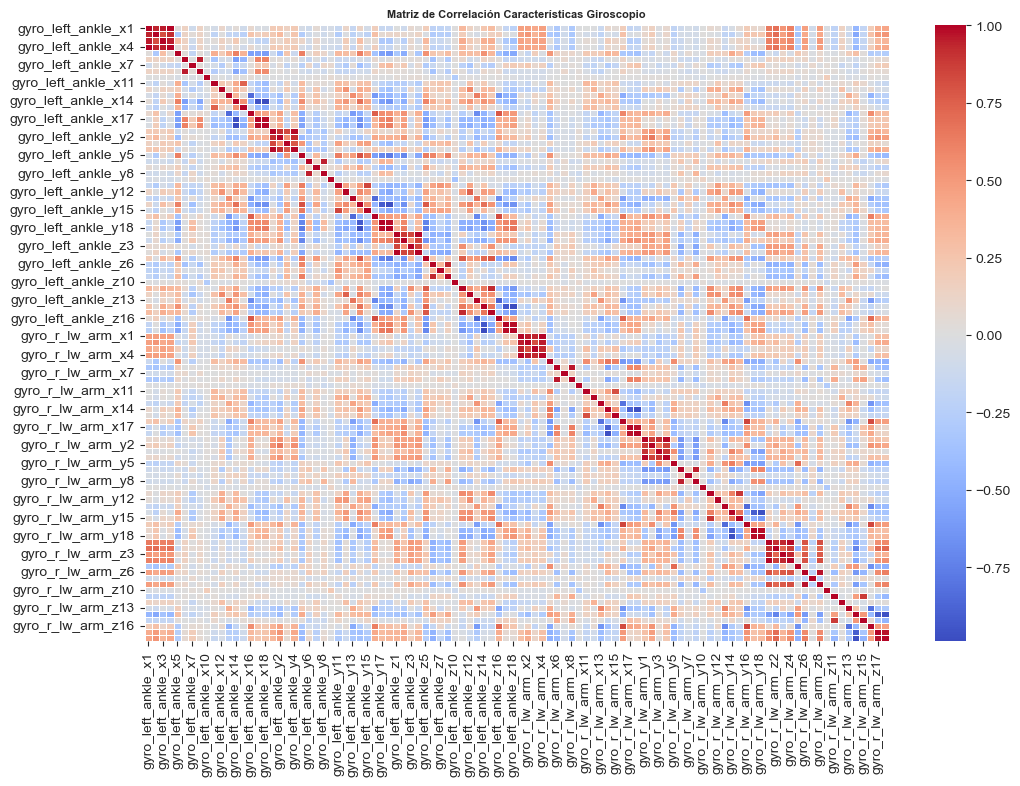

In [30]:
sns.set_style(random_style())

plt.figure(figsize=(12, 8))
corr = data_gyro.corr()
sns.heatmap(corr, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Matriz de Correlación Características Giroscopio', fontsize=8, fontweight='bold')
plt.show()
plt.close()

## Generar dataset con todas las características

In [31]:
all_data = pd.concat([data_acc, data_ecg, data_gyro], axis=1)

In [32]:
all_data.shape

(2230, 166)

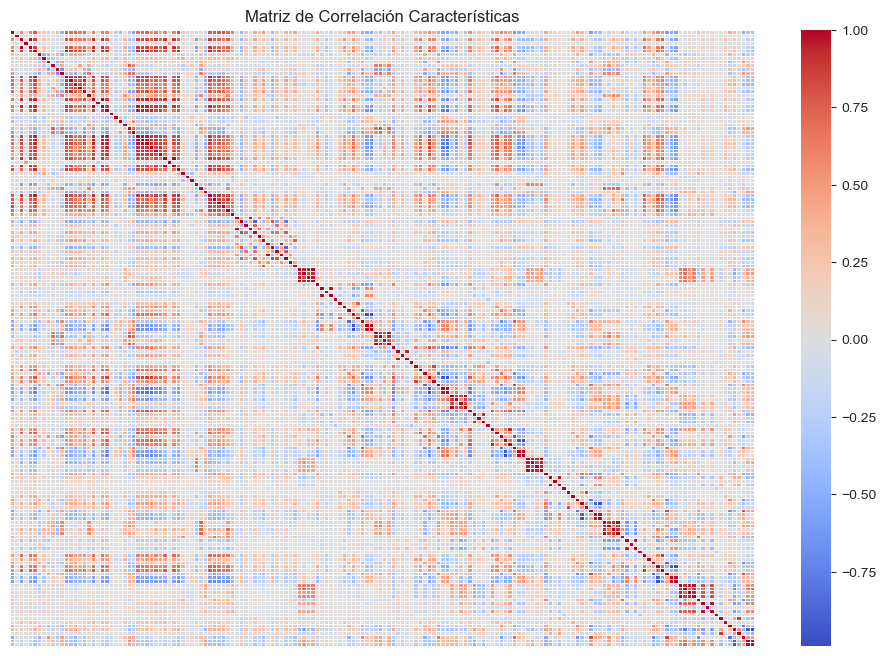

In [33]:
sns.set_style(random_style())

plt.figure(figsize=(12, 8))
corr = all_data.corr()
sns.heatmap(corr, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Matriz de Correlación Características')
plt.xticks([])  # Elimina los labels del eje X
plt.yticks([])  # Elimina los labels del eje Y
plt.show()
plt.close()

En general, podemos ver que hay características que guardan mucha correlación entre sí. Con valores absolutos de hasta 0.97, lo que indica que tenemos mucha información redundante, abriendo paso a aplicar técnicas de reducción de características.

# Implementación de Modelos

A continuación, se implementarán los modelos: Random Forest, Logistic Regression y Perceptron. Cada uno de ellos presentará una justificación con sus pros y contras relacionados al reconocimiento de la actividad humana.

De igual forma, para medir el rendimiento de los modelos, se utilizará la técnica de Cross Validation.

Recordemos que la validación cruzada es un método estadístico de evaluación del rendimiento de la generalización más estable y exhaustivo que la división en un conjunto de entrenamiento y otro de prueba. 

Específicamente, utilizaremos la variación de validación cruzada estratificada con grupos (StratifiedGroupKFold), en la que se tomarán folds con muestras de un solo grupo y cada fold será usado tanto como para entrenamiento como para prueba, pero sin aparecer en ambos durante la misma iteración; recordando que este dataset contiene información de 10 personas distintas (grupos).

Asimismo, utilizaremos las métricas Accuracy y F1-macro:

- Accuracy: La fracción de ejemplos clasificados correctamente.
- F1-macro: La métrica más utilizada para los conjuntos de datos desequilibrados en la configuración multiclase, es la versión multiclase del F1-Score. Calcula los F-scores no ponderados por clase. Esto da el mismo peso a todas las clases, sin importar cuál sea su tamaño.


*Müller, A. C., and Guido, S., Introduction to machine learning with Python: a guide for data scientists, O'Reilly Media, Inc. (2016), ISBN-13: 978-1-449-36941-5.*

In [34]:
from sklearn.model_selection import StratifiedGroupKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate, GroupKFold

In [35]:
# Dividir features y labels
X = all_data.drop(columns=['label', 'subject'])  # Características (sin la columna label)
y = all_data['label']  # Etiquetas
groups = all_data['subject']

In [36]:
groups.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [37]:
y.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [286]:
pure_models_avg = []

## Random Forest

Los bosques aleatorios para regresión y clasificación se encuentran actualmente entre los métodos de aprendizaje automático más utilizados. Son muy potentes, a menudo funcionan bien sin un ajuste excesivo de los parámetros y trabajan bien con datos con variabilidad en los rangos, de modo que no es necesario reescalar. Al igual que evitan en cierta medida el sobreajuste que suelen provocar los árboles de decisión por sí solos. (Müller, A. & Guido S., (2017), *Introduction to Machine Learning with Python*)



Asimismo, en Reiman, L. (2001). Random Forests. Machine Learning, 45(1), 5-32. Se menciona que los random forest son robustos al ruido en los datos, y como se ha visto en secciones anteriores, en los datos provenientes de sensores como los utilizados en la generación de este dataset es muy común encontrarnos con esa situación.

De igual forma, en el artículo de Zaki, Z., Shah, M. A., Wakil, K., & Sher, F. (2020). *Logistic Regression Based Human Activities Recognition*,
en el que el Random Forest se puso a prueba en conjunto con otros modelos de clasificación sobre los datasets UCI-HAR y HAPT, este obtuvo más del 90% de accururacy en ambos.

https://www.researchgate.net/publication/341106657_LOGISTIC_REGRESSION_BASED_HUMAN_ACTIVITIES_RECOGNITION

https://link.springer.com/article/10.1023/A:1010933404324

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [39]:
sgkf = StratifiedGroupKFold (n_splits=10, shuffle=True, random_state=10)

In [288]:
rf_model = RandomForestClassifier(n_estimators=150, max_depth=2, min_samples_split=8, random_state=46, class_weight='balanced')

scoring = {
    'accuracy': 'accuracy',
    'f1_macro': 'f1_macro'
}

results = cross_validate(
    rf_model,
    X,
    y,
    cv=sgkf,
    scoring=scoring,
    groups=groups,
    return_train_score=True
)

# Imprimir resultados de TEST
print("\n=== Métricas de TEST (validación) ===")
print("Accuracy por fold:", np.round(results['test_accuracy'], 4))
print("F1-macro por fold:", np.round(results['test_f1_macro'], 4))
print("\nAccuracy promedio (test): {:.4f}".format(results['test_accuracy'].mean()))
print("F1-macro promedio (test): {:.4f}".format(results['test_f1_macro'].mean()))

# Imprimir resultados de TRAIN
print("\n=== Métricas de TRAIN ===")
print("Accuracy por fold (train):", np.round(results['train_accuracy'], 4))
print("F1-macro por fold (train):", np.round(results['train_f1_macro'], 4))
print("\nAccuracy promedio (train): {:.4f}".format(results['train_accuracy'].mean()))
print("F1-macro promedio (train): {:.4f}".format(results['train_f1_macro'].mean()))
pure_models_avg.append((results['test_accuracy'].mean(), results['test_f1_macro'].mean()))


=== Métricas de TEST (validación) ===
Accuracy por fold: [0.9    0.9498 0.9738 0.9124 0.8869 0.973  0.9048 0.9955 0.9214 0.9183]
F1-macro por fold: [0.8764 0.9475 0.9752 0.8947 0.8673 0.9744 0.9026 0.9958 0.9094 0.921 ]

Accuracy promedio (test): 0.9336
F1-macro promedio (test): 0.9264

=== Métricas de TRAIN ===
Accuracy por fold (train): [0.9905 0.9796 0.9815 0.9796 0.9761 0.9711 0.981  0.9766 0.9815 0.9807]
F1-macro por fold (train): [0.9912 0.981  0.9828 0.981  0.9776 0.9725 0.9822 0.9781 0.9827 0.9819]

Accuracy promedio (train): 0.9798
F1-macro promedio (train): 0.9811


In [240]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

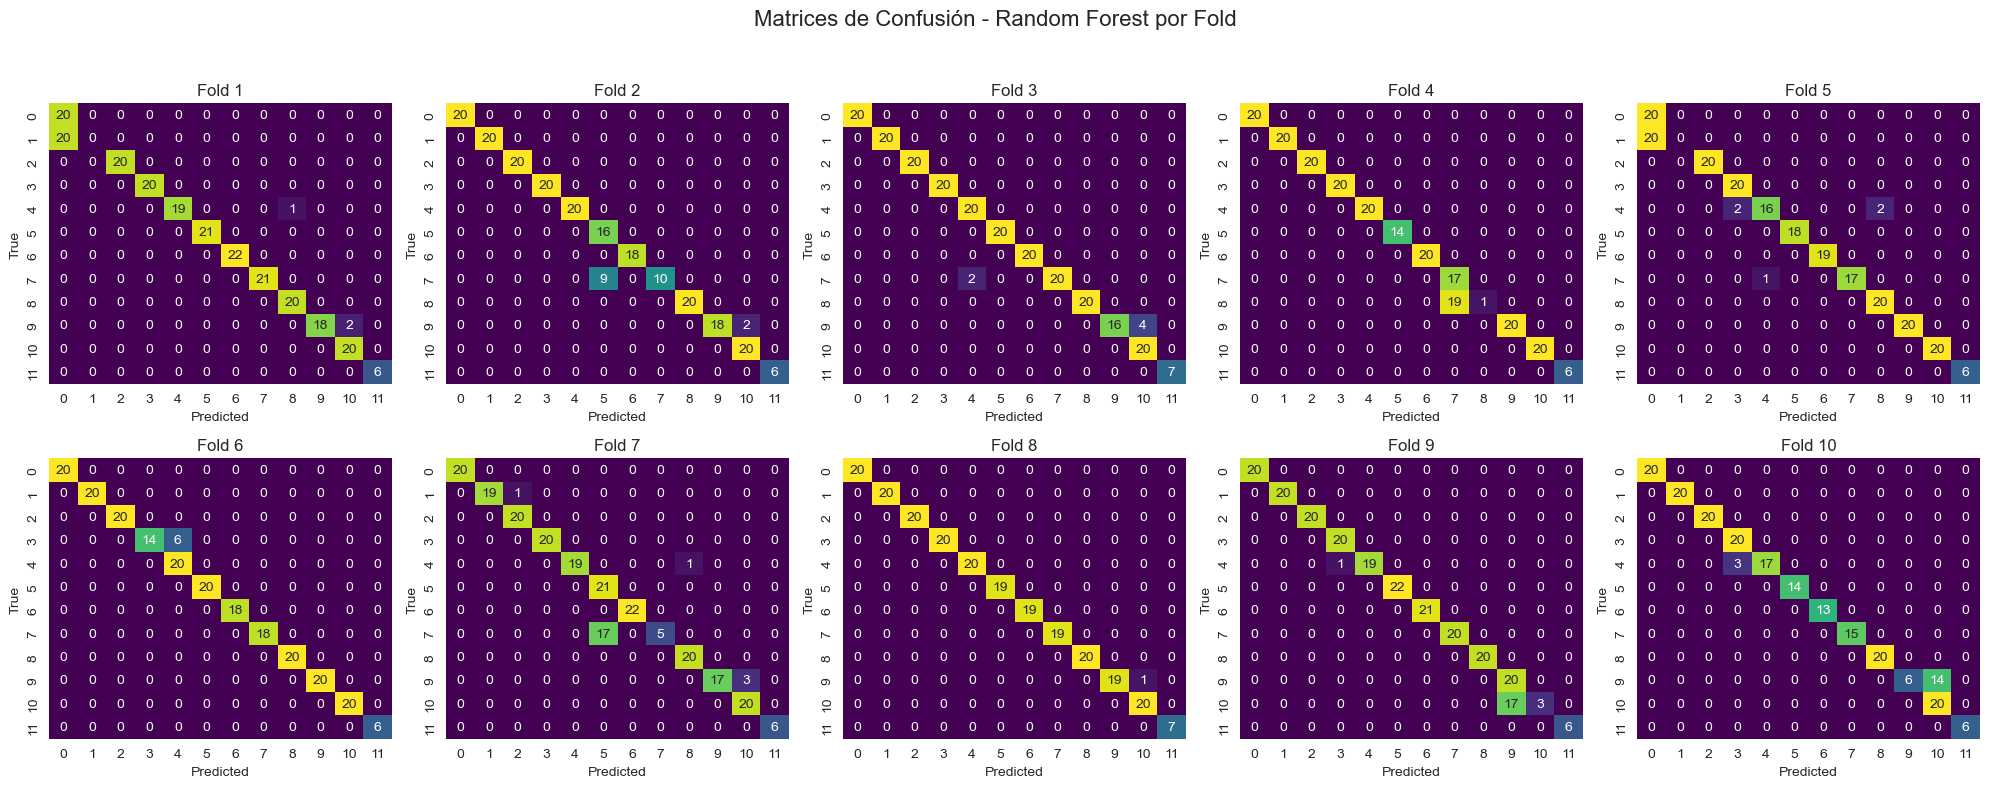

In [298]:
fig, axes = plt.subplots(2, 5, figsize=(20, 8))  
axes = axes.flatten()  
fig.suptitle("Matrices de Confusión - Random Forest por Fold", fontsize=16)

for fold, (train_idx, test_idx) in enumerate(sgkf.split(X, y, groups=groups), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', cbar=False,
                xticklabels=range(12), yticklabels=range(12), ax=axes[fold - 1])
    axes[fold - 1].set_title(f"Fold {fold}")
    axes[fold - 1].set_xlabel('Predicted')
    axes[fold - 1].set_ylabel('True')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Espacio para el título
plt.show()

Podemos notar que el modelo no logra identificar bien entre las actividades que son muy similares entre sí, como:

L1: Standing still / L2: Sitting and relaxing

al igual que:

L10: Jogging (1 min) / L11: Running (1 min)

Las cuales son pares de actividades que comparten muchas similitudes en aspectos como forma del movimiento, nivel de fuerza de la actividad, entre otros.


En general, podemos ver que nuestro modelo generaliza bien, pues en cada fold se dan F1 score y Accuracy superiores a 0.85, manteniendo un promedio de 0.93 y 0.92 respectivamente. 

Y recordemos que en este caso, cada fold representa datos provenientes de una persona distinta, por lo que siempre estamos aplicando el modelo en tests que no están presentes en el conjunto de entrenamiento, simulando datos nuevos, de modo que el modelo está respondiendo bien a entradas no vistas previamente.

## Logistic Regression

La regresión logística, y en general los modelos lineales son muy rápidos para entrenar y predecir, al igual que suelen tener un buen performance en situaciones en el que el número de características es muy grande comparado con el 
número de muestras (Müller, A. & Guido S., (2017), *Introduction to Machine Learning with Python*), caso similar al de este dataset, en el que tenemos más de 100 características y los ejemplos por clase son en promedio 200.

Asimismo, otro factor a tomar en cuenta para seleccionar el uso de este modelo fue lo encontrado en el artículo de Zaki, Z., Shah, M. A., Wakil, K., & Sher, F. (2020). *Logistic Regression Based Human Activities Recognition*,
en el que la regresión logística se puso a prueba en conjunto con otros modelos de clasificación sobre los datasets UCI-HAR y HAPT, en los que obtuvo una accuracy del 96.1% y 94.5% respectivamente.

https://www.researchgate.net/publication/341106657_LOGISTIC_REGRESSION_BASED_HUMAN_ACTIVITIES_RECOGNITION

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Recordemos que para este tipo de modelos, es requerido estandarizar nuestros datos.


(Müller, A. & Guido S., (2017), *Introduction to Machine Learning with Python*)

In [289]:
# Crear el modelo de regresión logística para multiclase
log_reg = LogisticRegression(C=0.0006 ,random_state=42, max_iter=100, class_weight="balanced")
log_reg_model = make_pipeline(StandardScaler(), log_reg)  # Escalado dentro del CV

scoring = {
    'accuracy': 'accuracy',
    'f1_macro': 'f1_macro'
}

results = cross_validate(
    log_reg_model,
    X,
    y,
    cv=sgkf,
    scoring=scoring,
    groups=groups,
    return_train_score=True
)

# Imprimir resultados de TEST
print("\n=== Métricas de TEST (validación) ===")
print("Accuracy por fold:", np.round(results['test_accuracy'], 4))
print("F1-macro por fold:", np.round(results['test_f1_macro'], 4))
print("\nAccuracy promedio (test): {:.4f}".format(results['test_accuracy'].mean()))
print("F1-macro promedio (test): {:.4f}".format(results['test_f1_macro'].mean()))

# Imprimir resultados de TRAIN
print("\n=== Métricas de TRAIN ===")
print("Accuracy por fold (train):", np.round(results['train_accuracy'], 4))
print("F1-macro por fold (train):", np.round(results['train_f1_macro'], 4))
print("\nAccuracy promedio (train): {:.4f}".format(results['train_accuracy'].mean()))
print("F1-macro promedio (train): {:.4f}".format(results['train_f1_macro'].mean()))
pure_models_avg.append((results['test_accuracy'].mean(), results['test_f1_macro'].mean()))


=== Métricas de TEST (validación) ===
Accuracy por fold: [0.9696 0.9954 0.8646 0.8065 0.8462 0.9595 0.8225 0.9955 0.9301 0.7067]
F1-macro por fold: [0.9708 0.9957 0.8428 0.7698 0.8248 0.9467 0.7738 0.9958 0.9206 0.7125]

Accuracy promedio (test): 0.8897
F1-macro promedio (test): 0.8753

=== Métricas de TRAIN ===
Accuracy por fold (train): [0.951  0.9523 0.9575 0.9622 0.9403 0.9532 0.9505 0.9521 0.9545 0.9575]
F1-macro por fold (train): [0.9538 0.9544 0.9595 0.9638 0.9432 0.9559 0.953  0.9549 0.9568 0.9598]

Accuracy promedio (train): 0.9531
F1-macro promedio (train): 0.9555


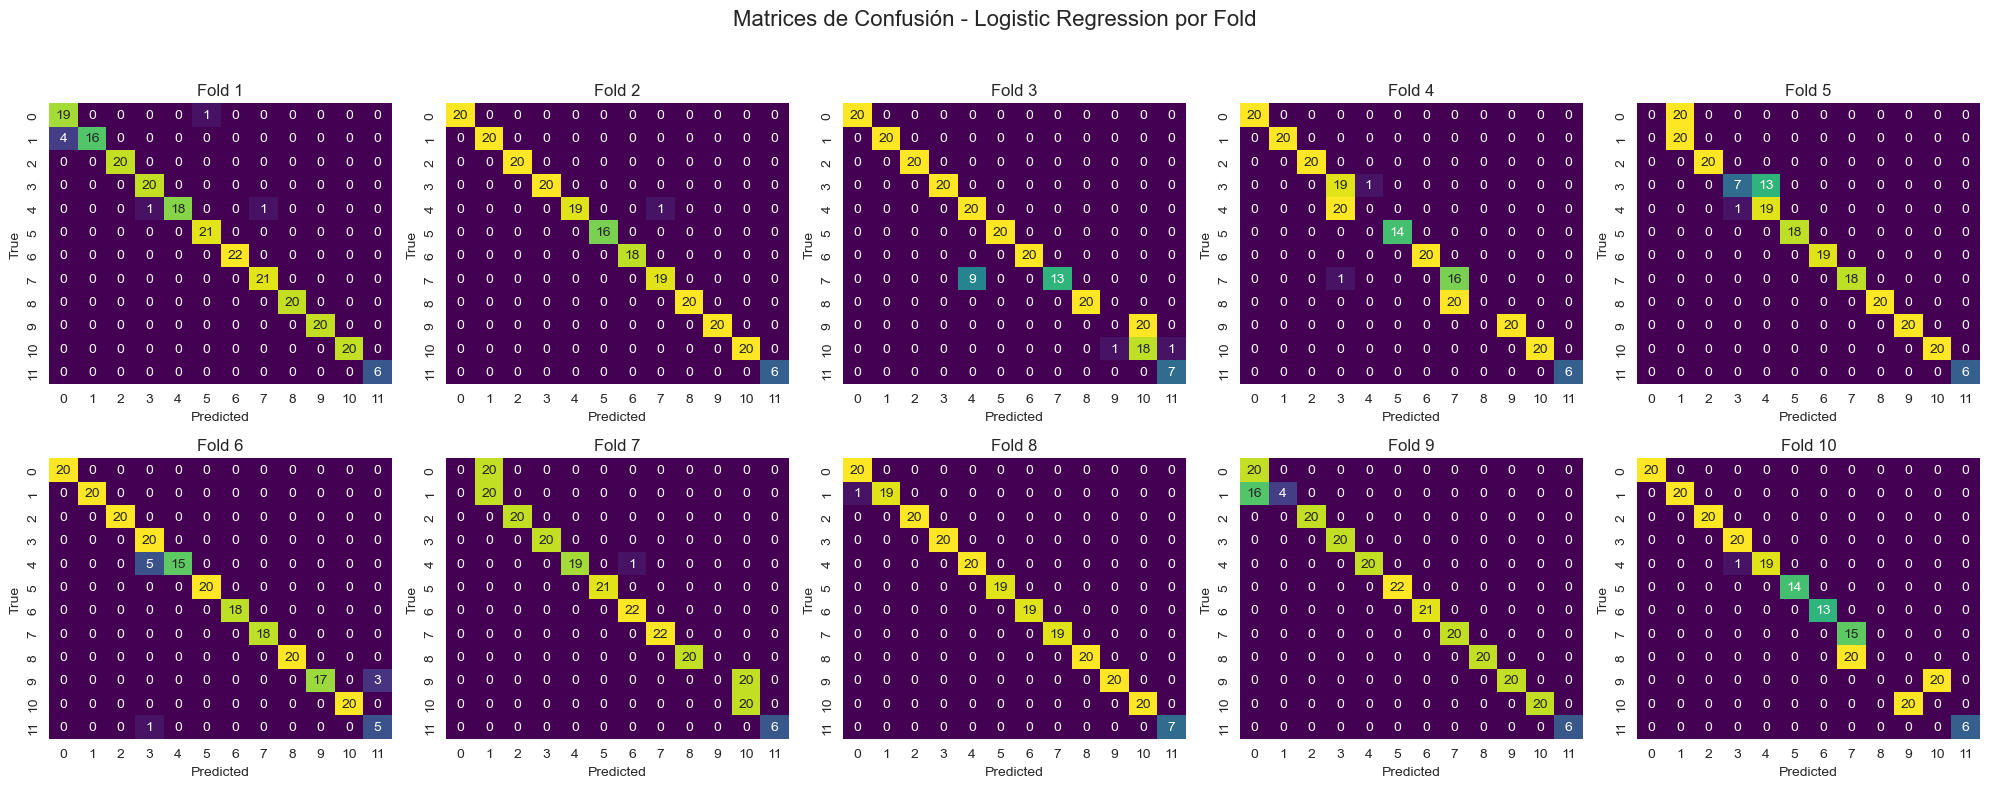

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(20, 8))  
axes = axes.flatten()  
fig.suptitle("Matrices de Confusión - Logistic Regression por Fold", fontsize=16)

for fold, (train_idx, test_idx) in enumerate(sgkf.split(X, y, groups=groups), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    log_reg_model.fit(X_train, y_train)
    y_pred = log_reg_model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', cbar=False,
                xticklabels=range(12), yticklabels=range(12), ax=axes[fold - 1])
    axes[fold - 1].set_title(f"Fold {fold}")
    axes[fold - 1].set_xlabel('Predicted')
    axes[fold - 1].set_ylabel('True')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Espacio para el título
plt.show()



Podemos notar que este modelo tiende a fallar en la clasificación de las mismas actividades que el Random Forest, al igual que en ocasiones no diferencía bien entre las actividades caminar y subir escaleras.

Pero, de igual manera, su rendimiento promedio en los test: 0.88 en Accuracy y 0.87 en F1 score nos indican que el modelo es capaz de generalizar de manera satisfactoria la mayoría de las veces.

## Perceptron

El Perceptrón es un algoritmo de aprendizaje automático lineal simple que puede ser efectivo para problemas de clasificación multiclase (Rosenblatt, 1958). Aunque es menos sofisticado que otros modelos, puede servir como línea base.

El Perceptrón, aunque simple, puede ser sorprendentemente efectivo para clasificación de actividades humanas cuando las características están bien seleccionadas. Según Bulling et al. (2014) en su trabajo sobre reconocimiento de actividad humana, los modelos lineales como el Perceptrón pueden alcanzar buenos resultados en conjuntos de datos con patrones claramente separables, como movimientos corporales distintos capturados por sensores.

In [123]:
from sklearn.linear_model import Perceptron

In [290]:
# Creación y entrenamiento del Perceptron
perceptron = Perceptron(random_state=42, max_iter=100, alpha=0.0005, shuffle=True, class_weight="balanced", penalty="l2")
model_perceptron = make_pipeline(StandardScaler(), perceptron)  # Escalado dentro del CV

scoring = {
    'accuracy': 'accuracy',
    'f1_macro': 'f1_macro'
}

results = cross_validate(
    model_perceptron,
    X,
    y,
    cv=sgkf,
    scoring=scoring,
    groups=groups,
    return_train_score=True
)

# Imprimir resultados de TEST
print("\n=== Métricas de TEST (validación) ===")
print("Accuracy por fold:", np.round(results['test_accuracy'], 4))
print("F1-macro por fold:", np.round(results['test_f1_macro'], 4))
print("\nAccuracy promedio (test): {:.4f}".format(results['test_accuracy'].mean()))
print("F1-macro promedio (test): {:.4f}".format(results['test_f1_macro'].mean()))

# Imprimir resultados de TRAIN
print("\n=== Métricas de TRAIN ===")
print("Accuracy por fold (train):", np.round(results['train_accuracy'], 4))
print("F1-macro por fold (train):", np.round(results['train_f1_macro'], 4))
print("\nAccuracy promedio (train): {:.4f}".format(results['train_accuracy'].mean()))
print("F1-macro promedio (train): {:.4f}".format(results['train_f1_macro'].mean()))
pure_models_avg.append((results['test_accuracy'].mean(), results['test_f1_macro'].mean()))


=== Métricas de TEST (validación) ===
Accuracy por fold: [0.987  0.9726 0.8777 0.8894 0.9095 0.9324 0.8139 0.9821 0.8821 0.8173]
F1-macro por fold: [0.9874 0.9741 0.8609 0.8956 0.9051 0.9223 0.7694 0.9832 0.8498 0.7969]

Accuracy promedio (test): 0.9064
F1-macro promedio (test): 0.8945

=== Métricas de TRAIN ===
Accuracy por fold (train): [0.9835 0.9692 0.9935 0.9841 0.9751 0.9796 0.989  0.9641 0.9675 0.9832]
F1-macro por fold (train): [0.9807 0.9705 0.9934 0.984  0.976  0.9803 0.9865 0.9652 0.9687 0.9837]

Accuracy promedio (train): 0.9789
F1-macro promedio (train): 0.9789


Justificación: Anguita et al. (2013), en su trabajo con el dataset HAR (Human Activity Recognition), demostraron que incluso modelos lineales pueden lograr >80% de precisión en clasificación de actividades cuando se usan características bien diseñadas de señales de sensores. El Perceptrón sirve como línea base para comparar con modelos más complejos.

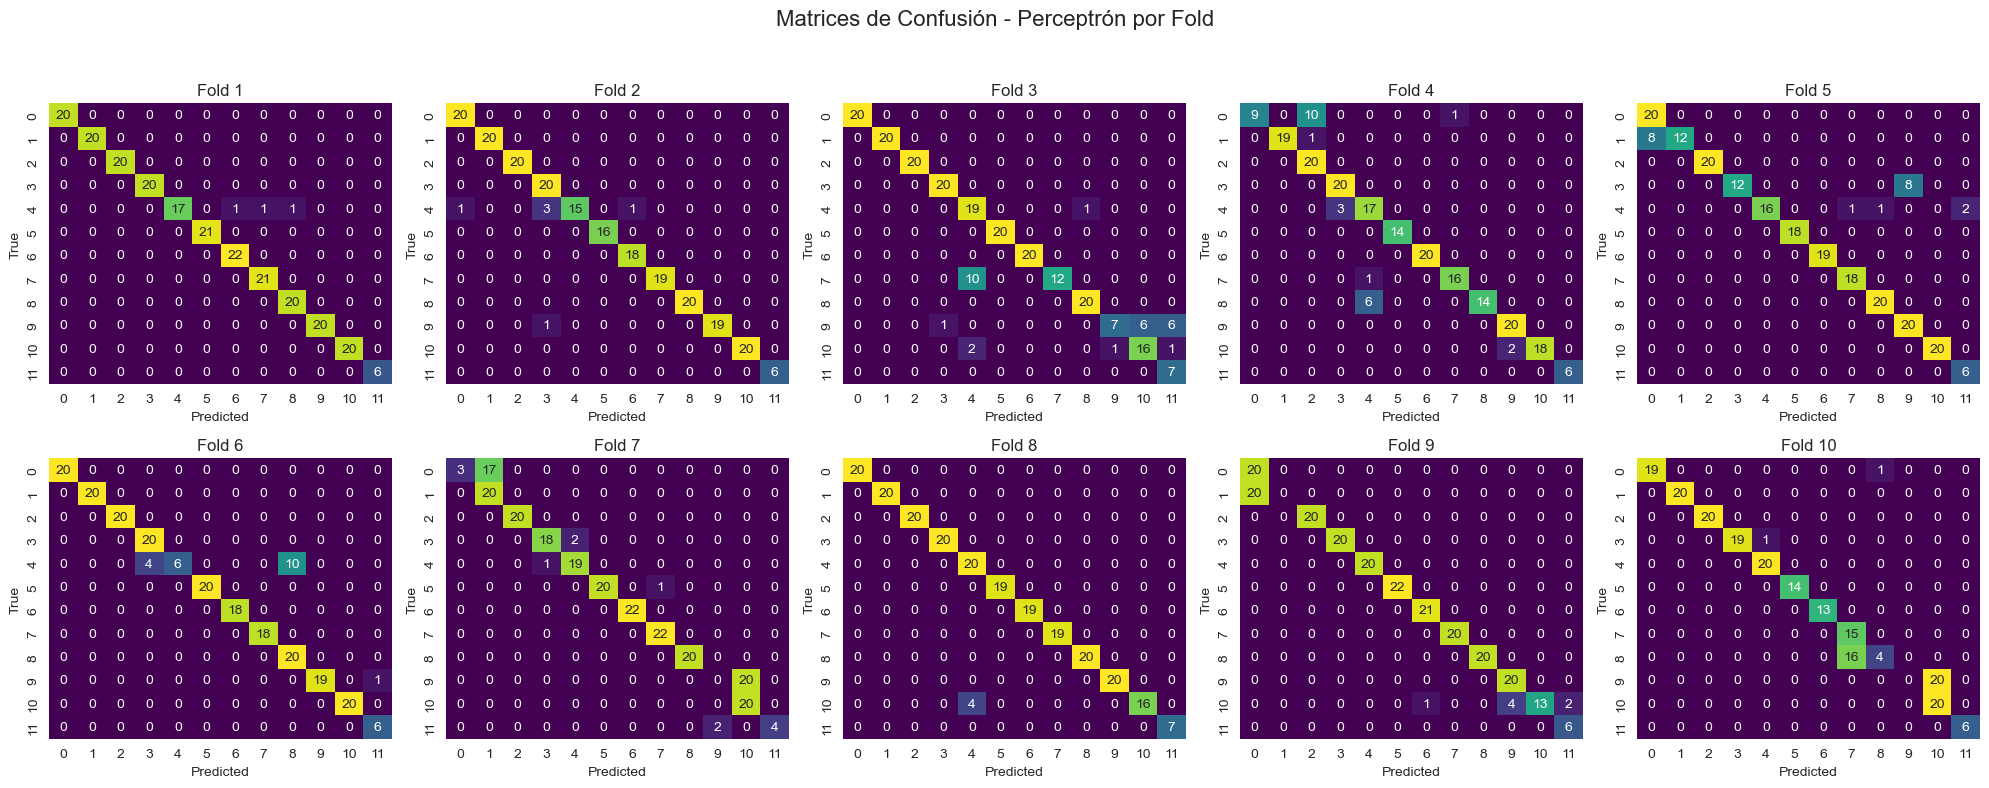

In [299]:
fig, axes = plt.subplots(2, 5, figsize=(20, 8))  
axes = axes.flatten()  
fig.suptitle("Matrices de Confusión - Perceptrón por Fold", fontsize=16)

for fold, (train_idx, test_idx) in enumerate(sgkf.split(X, y, groups=groups), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model_perceptron.fit(X_train, y_train)
    y_pred = model_perceptron.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', cbar=False,
                xticklabels=range(12), yticklabels=range(12), ax=axes[fold - 1])
    axes[fold - 1].set_title(f"Fold {fold}")
    axes[fold - 1].set_xlabel('Predicted')
    axes[fold - 1].set_ylabel('True')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Espacio para el título
plt.show()

Podemos notar que a este modelo, para algunas iteraciones, también repite los errores de los modelos pasados, pero también presenta dificultades para diferenciar entre la actividad de agacharse y manejar bicicleta en algunos folds, esto puede deberse a que la posición que toman nuestras rodillas y piernas durante el manejo de la bicicleta es similar a la que se toma para agacharse.

Sin embargo, es importante señalar que, en general, este modelo tuvo un rendimiento superior a la regresión logística, pues en promedio tuvo 0.90 de Accuracy y 0.89 de F1-macro, lo que indica que es ligeramente superior en cuanto a la capacidad de generalizar para datos no vistos durante el entrenamiento.

Asimismo, hasta este punto, el modelo que mejor rendimiento generó fue el Random Forest.

Recordando que hasta este momento hemos trabajado con todas las características disponibles, a continucación compararemos los resultados tras aplicar distintos métodos de reducción de características.

In [291]:
pure_models_avg

[(0.933582824320542, 0.9264324899721407),
 (0.8896601057216991, 0.8753206924706136),
 (0.9064023568814294, 0.8944698093780141)]

## Evaluación de Modelos con Reducción de Características

La reducción de dimensionalidad es crucial para mejorar la eficiencia computacional y potencialmente el rendimiento del modelo (Guyon & Elisseeff, 2003). Implementaremos tres técnicas:

- Análisis de Componentes Principales (PCA)
- Kernel PCA
- ANOVA F-test

In [255]:
# Modelos a evaluar
models = {
    'Bosques Aleatorios':  rf_model,
    'Regresión Logística': log_reg_model,
    'Perceptrón': model_perceptron
}

### Selección de Características con PCA

PCA es una técnica lineal que proyecta los datos en un espacio de menor dimensionalidad maximizando la varianza (Jolliffe, 2002).

PCA es particularmente útil para datos de sensores de actividad humana. Según Preece et al. (2009), las señales de acelerómetros y giroscopios suelen tener alta correlación entre canales, lo que hace que PCA sea efectivo para reducir dimensionalidad manteniendo la información relevante.

In [273]:
pca_avg = []

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.decomposition import PCA

print("\nEvaluación con PCA:")

pipeline_pca = make_pipeline(
    StandardScaler(),
    PCA(n_components=0.95, random_state=42)
)

for name, model in models.items():
    print(f"\nModelo: {name}")
    acc_scores = []
    f1_scores = []

    for fold, (train_idx, test_idx) in enumerate(sgkf.split(X, y, groups=groups), 1):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Fit-transform solo con train
        X_train_pca = pipeline_pca.fit_transform(X_train)
        X_test_pca = pipeline_pca.transform(X_test)

        if (fold==1):
            print(f"Dimensiones originales: {X_train.shape[1]}")
            print(f"Dimensiones después de Reduccion: {X_train_pca.shape[1]}")

        model.fit(X_train_pca, y_train)
        y_pred = model.predict(X_test_pca)

        # Métricas
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='macro')  # Usa 'macro' para clases desbalanceadas

        acc_scores.append(acc)
        f1_scores.append(f1)

        print(f"  Fold {fold}: Accuracy = {acc:.4f}, F1 = {f1:.4f}")

    pca_avg.append((sum(acc_scores)/len(acc_scores), sum(f1_scores)/len(f1_scores)))
    print(f"==> Promedio Accuracy: {sum(acc_scores)/len(acc_scores):.4f}")
    print(f"==> Promedio F1-score: {sum(f1_scores)/len(f1_scores):.4f}")



Evaluación con PCA:

Modelo: Bosques Aleatorios
Dimensiones originales: 164
Dimensiones después de PCA: 55
  Fold 1: Accuracy = 0.8957, F1 = 0.8916
  Fold 2: Accuracy = 0.8721, F1 = 0.8574
  Fold 3: Accuracy = 0.7162, F1 = 0.6890
  Fold 4: Accuracy = 0.6820, F1 = 0.6725
  Fold 5: Accuracy = 0.6199, F1 = 0.6038
  Fold 6: Accuracy = 0.8243, F1 = 0.7985
  Fold 7: Accuracy = 0.6320, F1 = 0.6136
  Fold 8: Accuracy = 0.7723, F1 = 0.7224
  Fold 9: Accuracy = 0.7773, F1 = 0.6904
  Fold 10: Accuracy = 0.6010, F1 = 0.5802
==> Promedio Accuracy: 0.7393
==> Promedio F1-score: 0.7119

Modelo: Regresión Logística
Dimensiones originales: 164
Dimensiones después de PCA: 55
  Fold 1: Accuracy = 0.9913, F1 = 0.9916
  Fold 2: Accuracy = 0.9909, F1 = 0.9873
  Fold 3: Accuracy = 0.8646, F1 = 0.8357
  Fold 4: Accuracy = 0.8111, F1 = 0.7705
  Fold 5: Accuracy = 0.9910, F1 = 0.9916
  Fold 6: Accuracy = 0.8829, F1 = 0.8582
  Fold 7: Accuracy = 0.8052, F1 = 0.7714
  Fold 8: Accuracy = 0.9955, F1 = 0.9958
  Fol

In [277]:
pca_avg

[(0.7392827149717845, 0.7119474209711055),
 (0.9110430667401334, 0.8958587946788897),
 (0.8629189062210916, 0.8504990302836622)]

### Selección de Características con Kernel PCA

Kernel PCA es una extensión no lineal de PCA que puede capturar relaciones más complejas (Schölkopf et al., 1997).

Justificación según la Literatura (Mika et al., 1999):

-Selección de Componentes: En la práctica, para problemas de reconocimiento de actividad humana, se recomienda seleccionar un número fijo de componentes basado en:

    -La capacidad computacional disponible

    -La regla empírica de mantener al menos el 95% de la varianza (aunque para KPCA esto es menos directo que en PCA)

-Parámetro gamma: El valor de gamma en el kernel RBF controla el suavizado. Para datos de sensores de actividad humana, estudios como el de Zhang et al. (2012) sugieren valores entre 0.01 y 1.0.

Para el kernel RBF, calculamos gamma automáticamente adaptado a la escala de nuestros datos, como sugirió Zhang et al. (2016) para datos de wearables:

$$GammaValue = 1 / (X\_ train.shape[1] * X\_ train.values.var())$$

In [278]:
kpca_avg = []

Implementamos KPCA con parámetros optimizados basados en la literatura (Mika et al., 1999; Hammerla et al., 2016):

In [ ]:
from sklearn.decomposition import KernelPCA
print("\nEvaluación con Kernel PCA:")


for name, model in models.items():
    print(f"\nModelo: {name}")
    acc_scores = []
    f1_scores = []

    for fold, (train_idx, test_idx) in enumerate(sgkf.split(X, y, groups=groups), 1):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        gamma_value = 1 / (X_train.shape[1] * X_train.values.var())

        # Configuración óptima para datos de actividad humana
        kpca = KernelPCA(         # Número fijo basado en evidencia empírica
                kernel='rbf',             # Kernel radial (óptimo para patrones de movimiento)
                gamma=gamma_value,       # Valor calculado automáticamente
                fit_inverse_transform=True, # Permite transformar nuevos datos
                remove_zero_eig=True,     # Elimina componentes redundantes
                n_components=100,     # Numero de componentes deseado
                random_state=42)        # Para reproducibilidad
                

        # Aplicación a los datos
        X_train_kpca = kpca.fit_transform(X_train)
        X_test_kpca = kpca.transform(X_test)


        if (fold==1):
            print(f"Dimensiones originales: {X_train.shape[1]}")
            print(f"Dimensiones después de Reduccion: {X_train_kpca.shape[1]}")

        model.fit(X_train_kpca, y_train)
        y_pred = model.predict(X_test_kpca)

        # Métricas
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='macro')  # Usa 'macro' para clases desbalanceadas

        acc_scores.append(acc)
        f1_scores.append(f1)

        print(f"  Fold {fold}: Accuracy = {acc:.4f}, F1 = {f1:.4f}")

    kpca_avg.append((sum(acc_scores)/len(acc_scores), sum(f1_scores)/len(f1_scores)))
    print(f"==> Promedio Accuracy: {sum(acc_scores)/len(acc_scores):.4f}")
    print(f"==> Promedio F1-score: {sum(f1_scores)/len(f1_scores):.4f}")



Evaluación con Kernel PCA:

Modelo: Bosques Aleatorios
Dimensiones originales: 164
Dimensiones después de PCA: 100
  Fold 1: Accuracy = 0.8174, F1 = 0.7836
  Fold 2: Accuracy = 0.6164, F1 = 0.5396
  Fold 3: Accuracy = 0.7904, F1 = 0.7452
  Fold 4: Accuracy = 0.6083, F1 = 0.5814
  Fold 5: Accuracy = 0.6154, F1 = 0.5707
  Fold 6: Accuracy = 0.5676, F1 = 0.5302
  Fold 7: Accuracy = 0.5584, F1 = 0.5298
  Fold 8: Accuracy = 0.8929, F1 = 0.8903
  Fold 9: Accuracy = 0.8253, F1 = 0.8033
  Fold 10: Accuracy = 0.5240, F1 = 0.4871
==> Promedio Accuracy: 0.6816
==> Promedio F1-score: 0.6461

Modelo: Regresión Logística
Dimensiones originales: 164
Dimensiones después de PCA: 100
  Fold 1: Accuracy = 0.8870, F1 = 0.8635
  Fold 2: Accuracy = 0.9909, F1 = 0.9914
  Fold 3: Accuracy = 0.9039, F1 = 0.8736
  Fold 4: Accuracy = 0.8018, F1 = 0.7630
  Fold 5: Accuracy = 0.9910, F1 = 0.9916
  Fold 6: Accuracy = 0.8919, F1 = 0.8563
  Fold 7: Accuracy = 0.8355, F1 = 0.8014
  Fold 8: Accuracy = 1.0000, F1 = 1.0

In [281]:
kpca_avg

[(0.6816134461194598, 0.6461251569365296),
 (0.9107950268786643, 0.8916290572477574),
 (0.8375491954890361, 0.8122143041671859)]

### Selección de Características con ANOVA F-test

En aplicaciones de mHealth (ej. clasificación de movimientos, detección de caídas), los datos provienen de múltiples sensores (acelerómetros, giroscopios, etc.), generando un alto número de características. El ANOVA F-test evalúa si las medias de estas características difieren significativamente entre clases (ej. "caminar" vs. "correr"), permitiendo seleccionar las más discriminativas (Kira & Rendell, 1992).

Los datos de actividad humana suelen ser de alta dimensionalidad (ej. ventanas temporales, frecuencias, ejes XYZ). Estudios como el de Anguita et al. (2013) en el dataset Human Activity Recognition (HAR) demostraron que el ANOVA F-test ayuda a eliminar características redundantes, mejorando el rendimiento de modelos como SVM y Random Forest.

In [283]:
anova_avg = []

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
print("\nEvaluación con Selección de Características con ANOVA F-test:")

for name, model in models.items():
    print(f"\nModelo: {name}")
    acc_scores = []
    f1_scores = []

    for fold, (train_idx, test_idx) in enumerate(sgkf.split(X, y, groups=groups), 1):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        selector = SelectKBest(score_func=f_classif, k=50)
        X_train_selected = selector.fit_transform(X_train, y_train)
        X_test_selected = selector.transform(X_test)


        model.fit(X_train_selected, y_train)
        y_pred = model.predict(X_test_selected)

        # Métricas
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='macro')  # Usa 'macro' para clases desbalanceadas

        acc_scores.append(acc)
        f1_scores.append(f1)

        print(f"  Fold {fold}: Accuracy = {acc:.4f}, F1 = {f1:.4f}")

    anova_avg.append((sum(acc_scores)/len(acc_scores), sum(f1_scores)/len(f1_scores)))
    print(f"==> Promedio Accuracy: {sum(acc_scores)/len(acc_scores):.4f}")
    print(f"==> Promedio F1-score: {sum(f1_scores)/len(f1_scores):.4f}")



Evaluación con Selección de Características con ANOVA F-test:

Modelo: Bosques Aleatorios
Dimensiones originales: 164
Dimensiones después de PCA: 50
  Fold 1: Accuracy = 0.8870, F1 = 0.8637
  Fold 2: Accuracy = 0.9726, F1 = 0.9712
  Fold 3: Accuracy = 0.9738, F1 = 0.9751
  Fold 4: Accuracy = 0.9124, F1 = 0.8947
  Fold 5: Accuracy = 0.9729, F1 = 0.9740
  Fold 6: Accuracy = 0.9054, F1 = 0.8845
  Fold 7: Accuracy = 0.9524, F1 = 0.9504
  Fold 8: Accuracy = 0.9955, F1 = 0.9958
  Fold 9: Accuracy = 0.9214, F1 = 0.9094
  Fold 10: Accuracy = 0.9760, F1 = 0.9791
==> Promedio Accuracy: 0.9469
==> Promedio F1-score: 0.9398

Modelo: Regresión Logística
Dimensiones originales: 164
Dimensiones después de PCA: 50
  Fold 1: Accuracy = 0.9043, F1 = 0.8809
  Fold 2: Accuracy = 0.9863, F1 = 0.9873
  Fold 3: Accuracy = 0.9083, F1 = 0.8894
  Fold 4: Accuracy = 0.7788, F1 = 0.7404
  Fold 5: Accuracy = 0.9910, F1 = 0.9914
  Fold 6: Accuracy = 0.9685, F1 = 0.9595
  Fold 7: Accuracy = 0.9221, F1 = 0.9155
  Fo

In [285]:
anova_avg

[(0.9469332453595383, 0.9398015320621778),
 (0.9138438358587588, 0.8969175690419654),
 (0.8729543390072158, 0.8387893986644783)]

## Comparación Técnicas de Reducción de Características

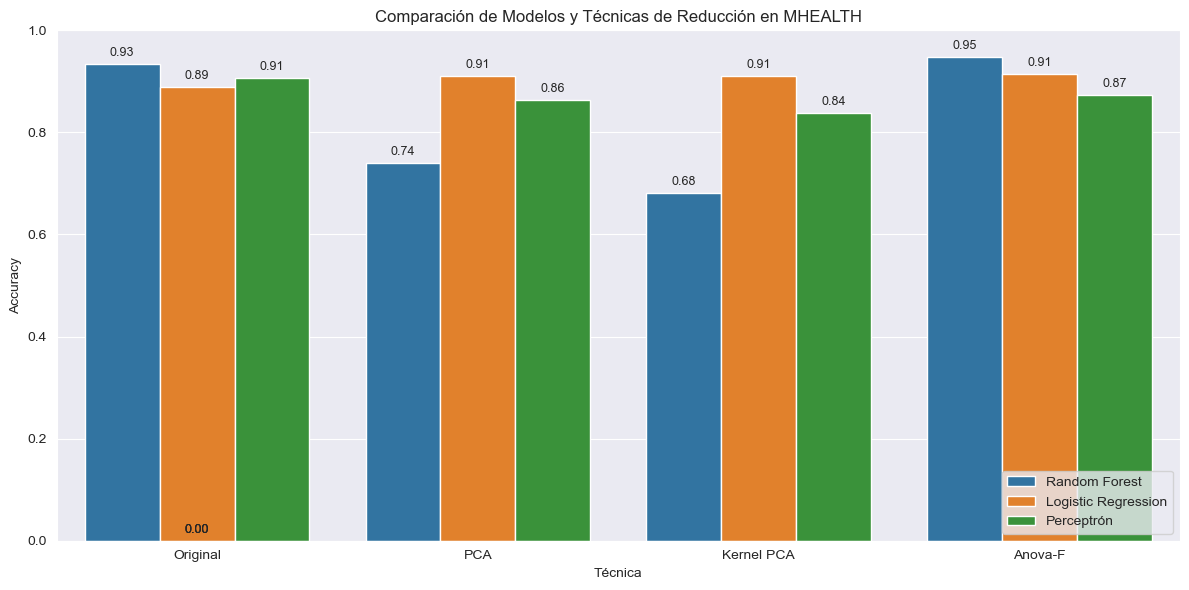

In [293]:
import matplotlib.pyplot as plt
import pandas as pd

# Recolectar resultados
results = []
results.append({'Técnica': 'Original', 'Modelo': 'Random Forest', 'Accuracy': pure_models_avg[0][0], 'F1-macro': pure_models_avg[0][1]})
results.append({'Técnica': 'Original', 'Modelo': 'Logistic Regression', 'Accuracy': pure_models_avg[1][0], 'F1-macro': pure_models_avg[1][1]})
results.append({'Técnica': 'Original', 'Modelo': 'Perceptrón', 'Accuracy': pure_models_avg[2][0], 'F1-macro': pure_models_avg[2][1]})

results.append({'Técnica': 'PCA', 'Modelo': 'Random Forest', 'Accuracy': pca_avg[0][0], 'F1-macro': pca_avg[0][1]})
results.append({'Técnica': 'PCA', 'Modelo': 'Logistic Regression', 'Accuracy': pca_avg[1][0], 'F1-macro': pca_avg[1][1]})
results.append({'Técnica': 'PCA', 'Modelo': 'Perceptrón', 'Accuracy': pca_avg[2][0], 'F1-macro': pca_avg[2][1]})

results.append({'Técnica': 'Kernel PCA', 'Modelo': 'Random Forest', 'Accuracy': kpca_avg[0][0], 'F1-macro': kpca_avg[0][1]})
results.append({'Técnica': 'Kernel PCA', 'Modelo': 'Logistic Regression', 'Accuracy': kpca_avg[1][0], 'F1-macro': kpca_avg[1][1]})
results.append({'Técnica': 'Kernel PCA', 'Modelo': 'Perceptrón', 'Accuracy': kpca_avg[2][0], 'F1-macro': kpca_avg[2][1]})

results.append({'Técnica': 'Anova-F', 'Modelo': 'Random Forest', 'Accuracy': anova_avg[0][0], 'F1-macro': anova_avg[0][1]})
results.append({'Técnica': 'Anova-F', 'Modelo': 'Logistic Regression', 'Accuracy': anova_avg[1][0], 'F1-macro': anova_avg[1][1]})
results.append({'Técnica': 'Anova-F', 'Modelo': 'Perceptrón', 'Accuracy': anova_avg[2][0], 'F1-macro': anova_avg[2][1]})

df_results = pd.DataFrame(results)

# Visualización con etiquetas
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Técnica', y='Accuracy', hue='Modelo', data=df_results)

plt.title('Comparación de Modelos y Técnicas de Reducción en MHEALTH')
plt.ylabel('Accuracy')
plt.ylim(0.0, 1.0)
plt.legend(loc='lower right')

# Añadir etiquetas con los valores encima de cada barra
for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):  # Evitar errores con valores NaN
        ax.text(
            x=p.get_x() + p.get_width() / 2,
            y=height + 0.01,
            s=f'{height:.2f}',
            ha='center',
            va='bottom',
            fontsize=9
        )

plt.tight_layout()
plt.show()

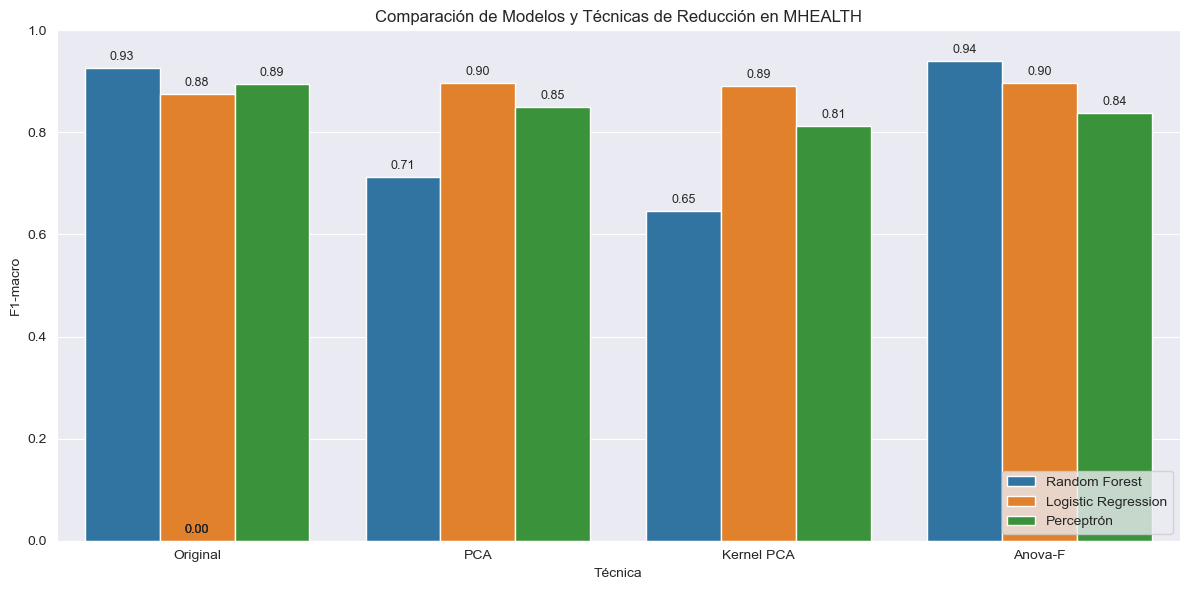

In [294]:
# Visualización con etiquetas
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Técnica', y='F1-macro', hue='Modelo', data=df_results)

plt.title('Comparación de Modelos y Técnicas de Reducción en MHEALTH')
plt.ylabel('F1-macro')
plt.ylim(0.0, 1.0)
plt.legend(loc='lower right')

# Añadir etiquetas con los valores encima de cada barra
for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):  # Evitar errores con valores NaN
        ax.text(
            x=p.get_x() + p.get_width() / 2,
            y=height + 0.01,
            s=f'{height:.2f}',
            ha='center',
            va='bottom',
            fontsize=9
        )

plt.tight_layout()
plt.show()

Podemos observar que tanto la técnica de PCA como la de Kernel PCA, únicamente mejoraron ligeramente las métricas para el modelo de Regresión Logística, sin embargo para los otros modelos inclusive redujeron su performance.

Por otro lado, la técnica de Anova-F mejoró significativamente el Accuracy y F1 del Random Forest y de la Regresión Logística, el Acccuracy promedio pasó de 0.93 a 0.95 en el Random Forest, en la Regresión Logística de 0.89 a 0.81 y el F1 promedio pasó de 0.93 a 0.94 en el Random Forest y de 0.88 a 0.90 en la regresión logística, en tanto que para el Perceptrón, empeoró en ambas métricas.

Otro aspecto remarcable del método antes mencionado, es que fue el que redujo a la menor cantidad de características, pasando de 164 a 50.

## Métodos de Fusión / Ensamble

Las técnicas de aprendizaje automático mediante ensamblado consisten en combinar múltiples modelos para mejorar el rendimiento predictivo. Estas técnicas han surgido como metodologías poderosas para el modelado predictivo y el análisis de datos.

Las técnicas de ensamblado como voting, bagging, boosting y stacking mejoran significativamente el rendimiento de los modelos de aprendizaje automático, superando así a los modelos individuales o tradicionales. Se destaca la importancia de estas técnicas para abordar errores del modelo como el sesgo y la varianza. Mientras que bagging busca reducir la varianza, boosting se enfoca en minimizar el sesgo. Stacking, al combinar modelos diversos, ofrece un enfoque integral para manejar tanto el sesgo como la varianza.

Jadama, Ansumana & Toray, Modou. (2024). *Ensemble Learning: Methods, Techniques, Application*. 10.13140/RG.2.2.28017.08802. 

Recuperado de: https://www.researchgate.net/publication/381773312_Ensemble_Learning_Methods_Techniques_Application

### Bagging:

Notemos que un ejemplo común de la técnica Bagging es el Random Forest por sí mismo, modelo que ya hemos presentado y cuyo rendimiento ha sido el mejor hasta ahora.

Por ello, utilizaremos el resto de los métodos de ensamble en contraste con los resultados obtenidos previamente del Random Forest con la reducción de características con Anova-F.

### Weighted Majority Vote

Los métodos de ensamble por votación combinan las predicciones de múltiples clasificadores base, reduciendo el sesgo individual y mejorando la precisión general en HAR. Esto es especialmente útil cuando se trabaja con datos de sensores multi-modal, donde diferentes modelos capturan distintos aspectos de las señales. \cite{Bulling}

En el caso del Weighted Majority Vote, se le asignan pesos específicos a cada modelo dentro del ensamble.

In [301]:
!pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   --------------- ------------------------ 0.5/1.4 MB 578.7 kB/s eta 0:00:02
   --------------- ------------------------ 0.5/1.4 MB 578.7 kB/s eta 0:00:02
   ----------------------- ---------------- 0.8/1.4 MB 610.3 kB/s eta 0:00:01
   ----------------------- ---------------- 0.8/1.4 MB 610.3 kB/s eta 0:00:01
   ------------------------------- -------- 1.0/1.4 MB 637.3 kB/s eta 0:00:01
   -------------------------------------- - 1.3/1.4 MB 670.9 kB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 658.3 kB/s eta 0:00:00


In [302]:
from mlxtend.classifier import EnsembleVoteClassifier

In [326]:
print("Evaluación con EnsembleVoteClassifier:")
selector = SelectKBest(score_func=f_classif, k=50)
eclf = EnsembleVoteClassifier(clfs=[rf_model, log_reg_model, model_perceptron], weights=[0.6,0.5,0.5])
vote_avg = []
acc_scores = []
f1_scores = []

for fold, (train_idx, test_idx) in enumerate(sgkf.split(X, y, groups=groups), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)
   
    eclf.fit(X_train_selected, y_train)
    y_pred = eclf.predict(X_test_selected)

    # Métricas
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')  # Usa 'macro' para clases desbalanceadas

    acc_scores.append(acc)
    f1_scores.append(f1)

    print(f"  Fold {fold}: Accuracy = {acc:.4f}, F1 = {f1:.4f}")

vote_avg.append((sum(acc_scores)/len(acc_scores), sum(f1_scores)/len(f1_scores)))
print(f"==> Promedio Accuracy: {sum(acc_scores)/len(acc_scores):.4f}")
print(f"==> Promedio F1-score: {sum(f1_scores)/len(f1_scores):.4f}")


Evaluación con EnsembleVoteClassifier:
  Fold 1: Accuracy = 0.9087, F1 = 0.8851
  Fold 2: Accuracy = 1.0000, F1 = 1.0000
  Fold 3: Accuracy = 0.8996, F1 = 0.8812
  Fold 4: Accuracy = 0.8295, F1 = 0.8113
  Fold 5: Accuracy = 0.9955, F1 = 0.9958
  Fold 6: Accuracy = 0.9144, F1 = 0.8978
  Fold 7: Accuracy = 0.9913, F1 = 0.9916
  Fold 8: Accuracy = 0.9955, F1 = 0.9958
  Fold 9: Accuracy = 0.8996, F1 = 0.8553
  Fold 10: Accuracy = 0.8990, F1 = 0.8847
==> Promedio Accuracy: 0.9333
==> Promedio F1-score: 0.9199


### Ada Boost

In [350]:
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.tree import DecisionTreeClassifier

In [366]:
abc = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3, max_leaf_nodes=4), n_estimators=100, random_state=46, algorithm='SAMME', learning_rate = 1.5) 

In [367]:
print("Evaluación con AdaBoostClassifier:")
selector = SelectKBest(score_func=f_classif, k=50)
ada_boost_avg = []
acc_scores = []
f1_scores = []

for fold, (train_idx, test_idx) in enumerate(sgkf.split(X, y, groups=groups), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)
   
    abc.fit(X_train_selected, y_train)
    y_pred = abc.predict(X_test_selected)

    # Métricas
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')  # Usa 'macro' para clases desbalanceadas

    acc_scores.append(acc)
    f1_scores.append(f1)

    print(f"  Fold {fold}: Accuracy = {acc:.4f}, F1 = {f1:.4f}")

ada_boost_avg.append((sum(acc_scores)/len(acc_scores), sum(f1_scores)/len(f1_scores)))
print(f"==> Promedio Accuracy: {sum(acc_scores)/len(acc_scores):.4f}")
print(f"==> Promedio F1-score: {sum(f1_scores)/len(f1_scores):.4f}")

Evaluación con AdaBoostClassifier:
  Fold 1: Accuracy = 0.9087, F1 = 0.8847
  Fold 2: Accuracy = 0.9041, F1 = 0.8847
  Fold 3: Accuracy = 0.9956, F1 = 0.9960
  Fold 4: Accuracy = 0.8571, F1 = 0.8421
  Fold 5: Accuracy = 1.0000, F1 = 1.0000
  Fold 6: Accuracy = 0.8604, F1 = 0.8327
  Fold 7: Accuracy = 0.9524, F1 = 0.9515
  Fold 8: Accuracy = 1.0000, F1 = 1.0000
  Fold 9: Accuracy = 0.9345, F1 = 0.9273
  Fold 10: Accuracy = 1.0000, F1 = 1.0000
==> Promedio Accuracy: 0.9413
==> Promedio F1-score: 0.9319


In [369]:
# Recolectar resultados
results = []

results.append({'Modelo': 'Random Forest', 'Accuracy': anova_avg[0][0], 'F1-macro': anova_avg[0][1]})
results.append({'Modelo': 'Voting Ensamble', 'Accuracy': vote_avg[0][0], 'F1-macro': vote_avg[0][1]})
results.append({'Modelo': 'AdaBoost Ensamble', 'Accuracy': ada_boost_avg[0][0], 'F1-macro': ada_boost_avg[0][1]})

df_results = pd.DataFrame(results)

C:\Users\C-Ramirez\AppData\Local\Temp\ipykernel_34240\695531787.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower right')


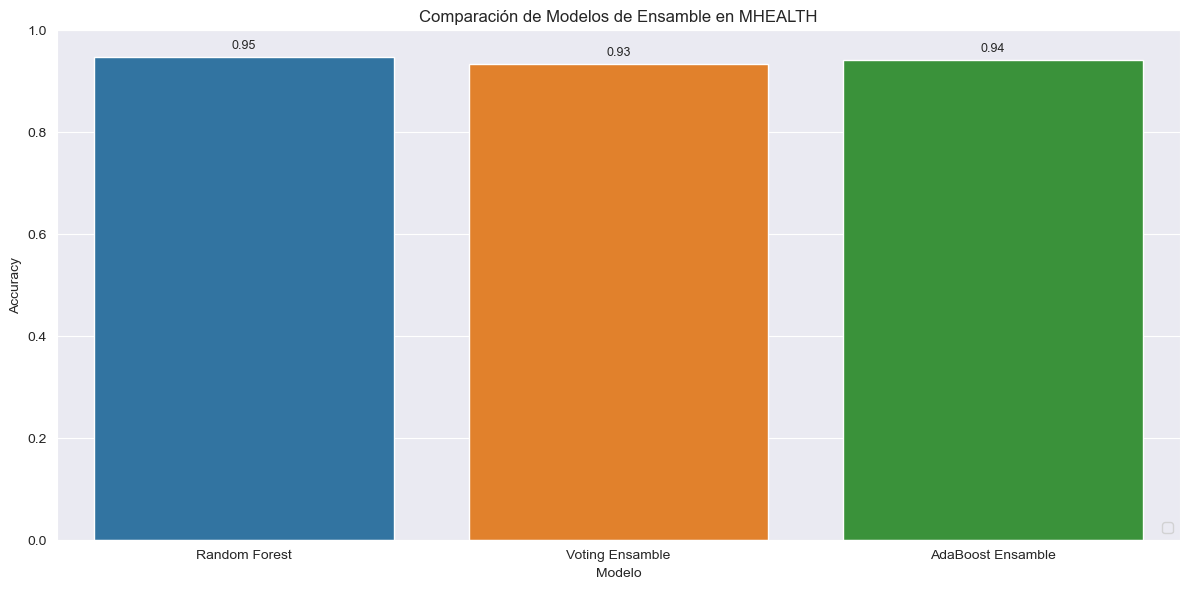

In [371]:
# Visualización con etiquetas
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Modelo', y='Accuracy', hue='Modelo', data=df_results)

plt.title('Comparación de Modelos de Ensamble en MHEALTH')
plt.ylabel('Accuracy')
plt.ylim(0.0, 1.0)
plt.legend(loc='lower right')

# Añadir etiquetas con los valores encima de cada barra
for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):  # Evitar errores con valores NaN
        ax.text(
            x=p.get_x() + p.get_width() / 2,
            y=height + 0.01,
            s=f'{height:.2f}',
            ha='center',
            va='bottom',
            fontsize=9
        )

plt.tight_layout()
plt.show()

C:\Users\C-Ramirez\AppData\Local\Temp\ipykernel_34240\3641416274.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower right')


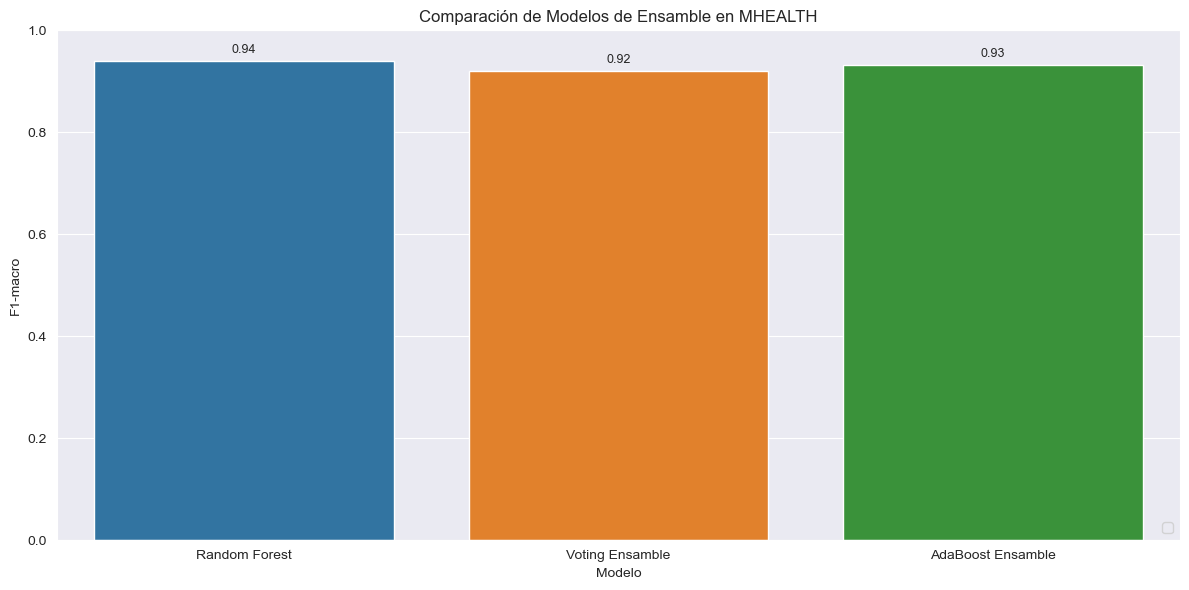

In [370]:
# Visualización con etiquetas
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Modelo', y='F1-macro', hue='Modelo', data=df_results)

plt.title('Comparación de Modelos de Ensamble en MHEALTH')
plt.ylabel('F1-macro')
plt.ylim(0.0, 1.0)
plt.legend(loc='lower right')

# Añadir etiquetas con los valores encima de cada barra
for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):  # Evitar errores con valores NaN
        ax.text(
            x=p.get_x() + p.get_width() / 2,
            y=height + 0.01,
            s=f'{height:.2f}',
            ha='center',
            va='bottom',
            fontsize=9
        )

plt.tight_layout()
plt.show()